In [ ]:
!pip install labelme opencv-python matplotlib albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.9 MB/s eta 0:00:00


In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
IMAGES_PATH = os.path.join('/content/drive/MyDrive', 'face_detection', 'images')

In [4]:
!pip install cloud-tpu-client
!pip install tensorflow==2.12.0

In [4]:
!pip install tensorflow

In [5]:
# Import necessary libraries
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import uuid
import os
import shutil

import tensorflow as tf
import json
from matplotlib import pyplot as plt

In [ ]:
# SINGLE IMAGE CAPTURE
# Function to capture an image using JavaScript
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '📷 Capture Image';
            div.appendChild(capture);
            document.body.appendChild(div);

            const video = document.createElement('video');
            video.style.display = 'block';
            document.body.appendChild(video);

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            video.remove();
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)

    return filename

# Capture and save the image
image_filename = f"/content/drive/MyDrive/face_detection/images/{uuid.uuid1()}.jpg"  # Unique filename
captured_image = take_photo(image_filename)
print(f"✅ Image saved: {captured_image}")


<IPython.core.display.Javascript object>

✅ Image saved: /content/drive/MyDrive/face_detection/images/66e349f6-fccd-11ef-8904-0242ac1c000c.jpg


Enter the number of images to capture: 19
📸 Capturing image 1/19...
⏳ Waiting 2.57 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 1 saved: /content/drive/MyDrive/face_detection/images/55b85514-fcd1-11ef-8904-0242ac1c000c.jpg
📸 Capturing image 2/19...
⏳ Waiting 2.17 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 2 saved: /content/drive/MyDrive/face_detection/images/58f0c4e6-fcd1-11ef-8904-0242ac1c000c.jpg
📸 Capturing image 3/19...
⏳ Waiting 2.44 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 3 saved: /content/drive/MyDrive/face_detection/images/5c37c65e-fcd1-11ef-8904-0242ac1c000c.jpg
📸 Capturing image 4/19...
⏳ Waiting 2.06 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 4 saved: /content/drive/MyDrive/face_detection/images/5f4c30e6-fcd1-11ef-8904-0242ac1c000c.jpg
📸 Capturing image 5/19...
⏳ Waiting 2.16 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 5 saved: /content/drive/MyDrive/face_detection/images/627b3cf8-fcd1-11ef-8904-0242ac1c000c.jpg
📸 Capturing image 6/19...
⏳ Waiting 2.71 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 6 saved: /content/drive/MyDrive/face_detection/images/65eab4c2-fcd1-11ef-8904-0242ac1c000c.jpg
📸 Capturing image 7/19...
⏳ Waiting 2.26 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 7 saved: /content/drive/MyDrive/face_detection/images/6926a380-fcd1-11ef-8904-0242ac1c000c.jpg
📸 Capturing image 8/19...
⏳ Waiting 2.29 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 8 saved: /content/drive/MyDrive/face_detection/images/6c561bf8-fcd1-11ef-8904-0242ac1c000c.jpg
📸 Capturing image 9/19...
⏳ Waiting 2.96 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 9 saved: /content/drive/MyDrive/face_detection/images/6fee8f20-fcd1-11ef-8904-0242ac1c000c.jpg
📸 Capturing image 10/19...
⏳ Waiting 2.14 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 10 saved: /content/drive/MyDrive/face_detection/images/730ecc7e-fcd1-11ef-8904-0242ac1c000c.jpg
📸 Capturing image 11/19...
⏳ Waiting 2.74 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 11 saved: /content/drive/MyDrive/face_detection/images/76830172-fcd1-11ef-8904-0242ac1c000c.jpg
📸 Capturing image 12/19...
⏳ Waiting 2.76 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 12 saved: /content/drive/MyDrive/face_detection/images/7a022d78-fcd1-11ef-8904-0242ac1c000c.jpg
📸 Capturing image 13/19...
⏳ Waiting 2.49 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 13 saved: /content/drive/MyDrive/face_detection/images/7d57dc2a-fcd1-11ef-8904-0242ac1c000c.jpg
📸 Capturing image 14/19...
⏳ Waiting 2.84 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 14 saved: /content/drive/MyDrive/face_detection/images/80e743bc-fcd1-11ef-8904-0242ac1c000c.jpg
📸 Capturing image 15/19...
⏳ Waiting 2.12 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 15 saved: /content/drive/MyDrive/face_detection/images/8401c022-fcd1-11ef-8904-0242ac1c000c.jpg
📸 Capturing image 16/19...
⏳ Waiting 2.06 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 16 saved: /content/drive/MyDrive/face_detection/images/8725abba-fcd1-11ef-8904-0242ac1c000c.jpg
📸 Capturing image 17/19...
⏳ Waiting 2.70 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 17 saved: /content/drive/MyDrive/face_detection/images/8aa2a4a0-fcd1-11ef-8904-0242ac1c000c.jpg
📸 Capturing image 18/19...
⏳ Waiting 2.88 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 18 saved: /content/drive/MyDrive/face_detection/images/8e449ac8-fcd1-11ef-8904-0242ac1c000c.jpg
📸 Capturing image 19/19...
⏳ Waiting 2.98 seconds before capturing...


<IPython.core.display.Javascript object>

✅ Image 19 saved: /content/drive/MyDrive/face_detection/images/91f53600-fcd1-11ef-8904-0242ac1c000c.jpg

🎯 19 images successfully captured!



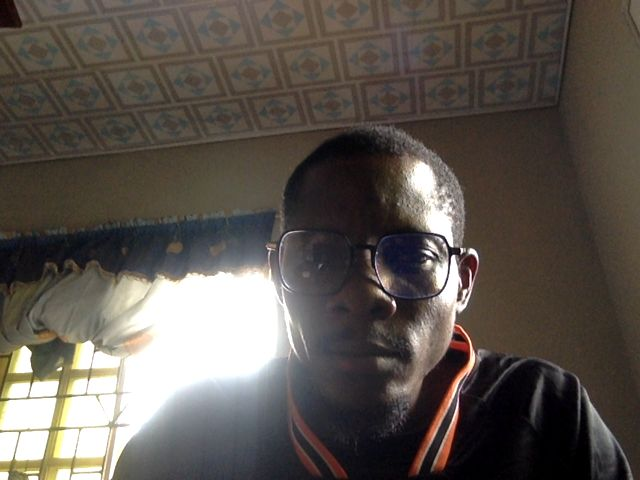
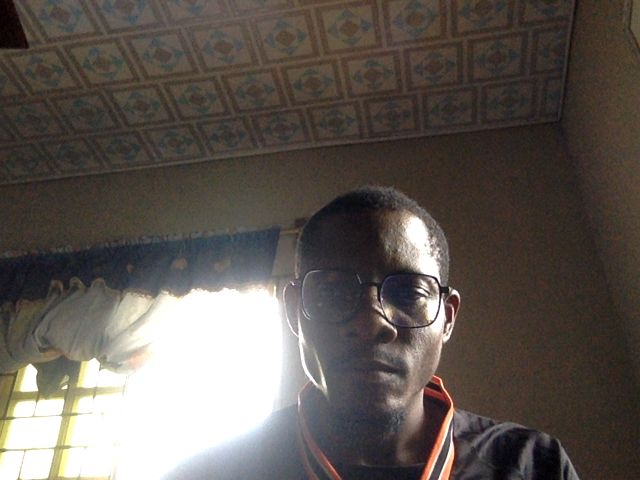
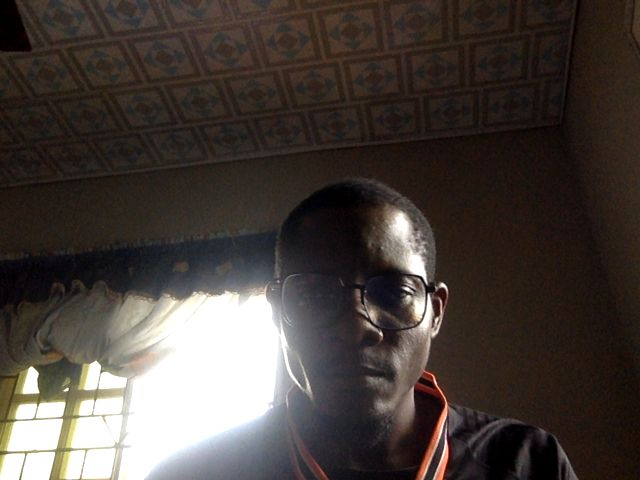
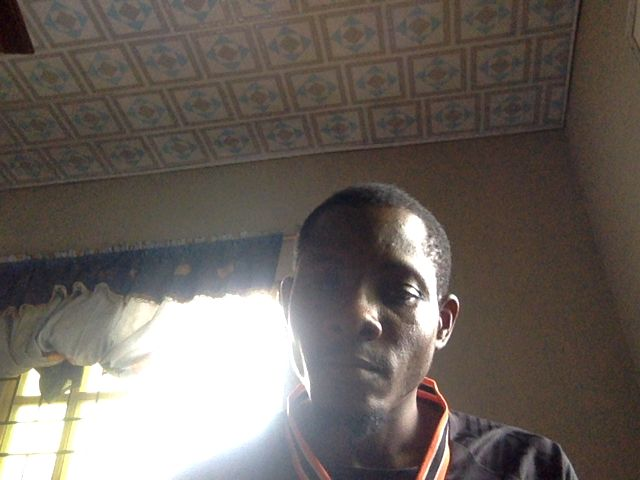
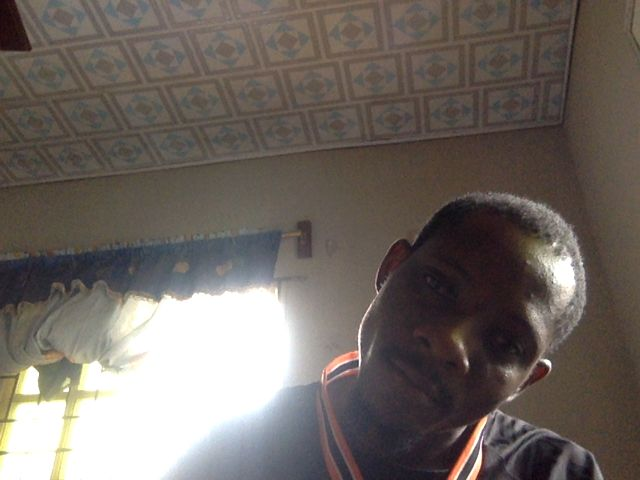
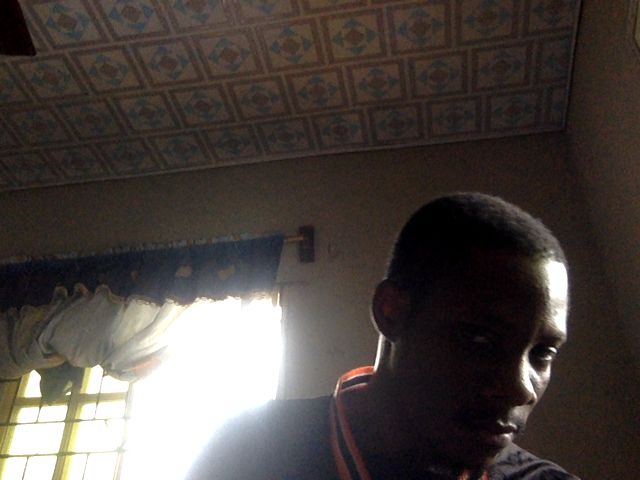
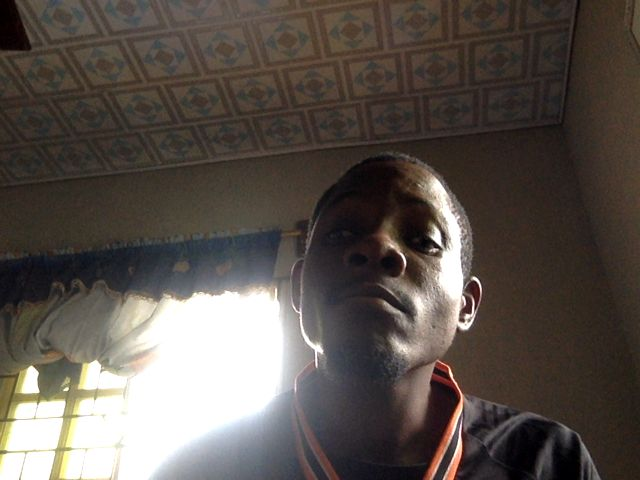
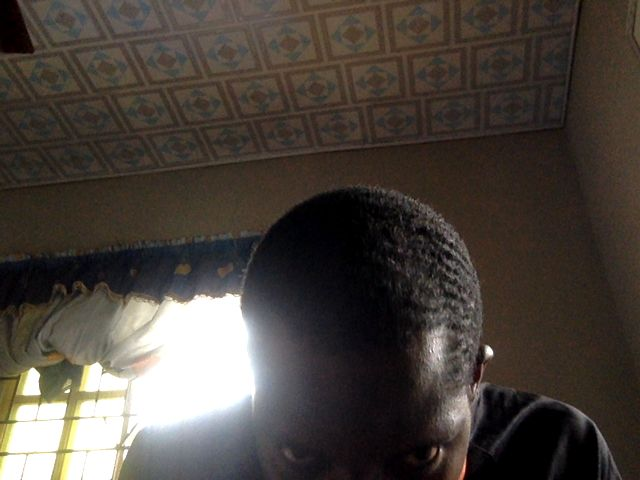
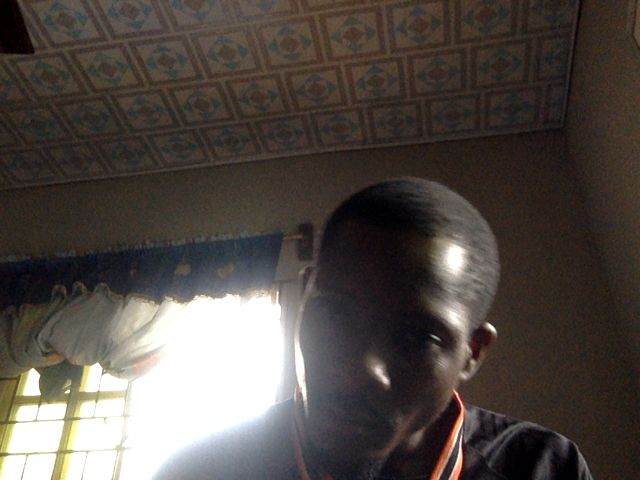
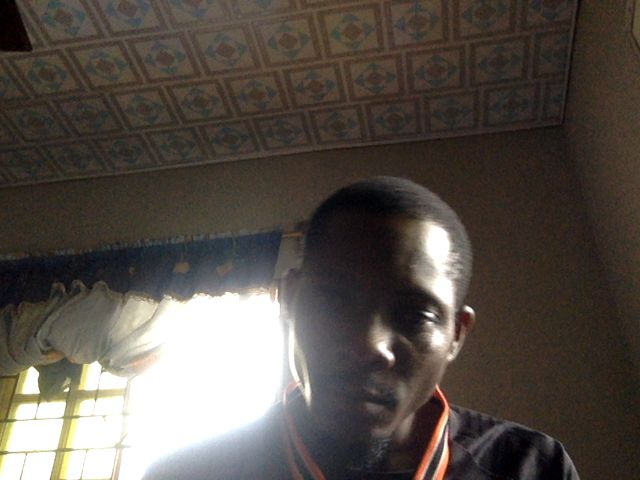
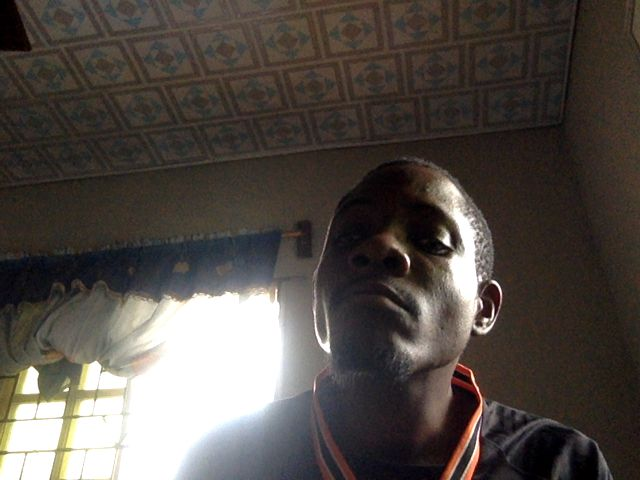
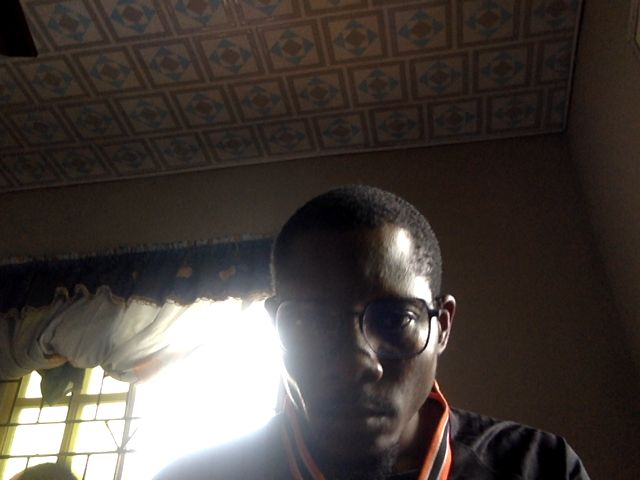
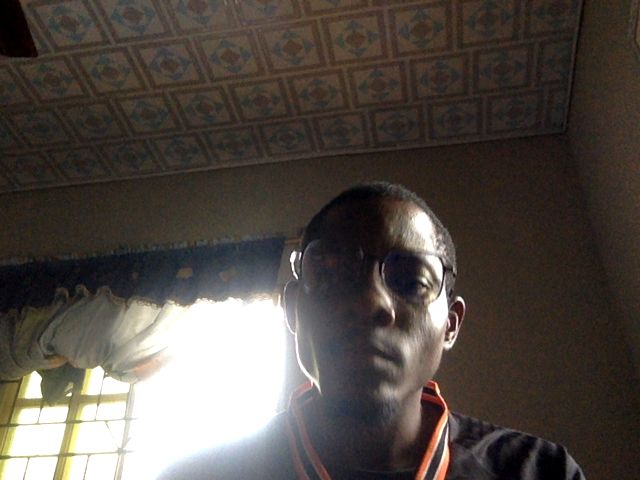
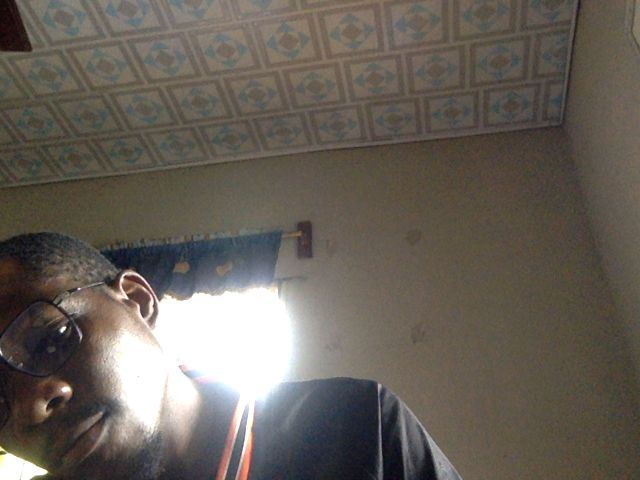
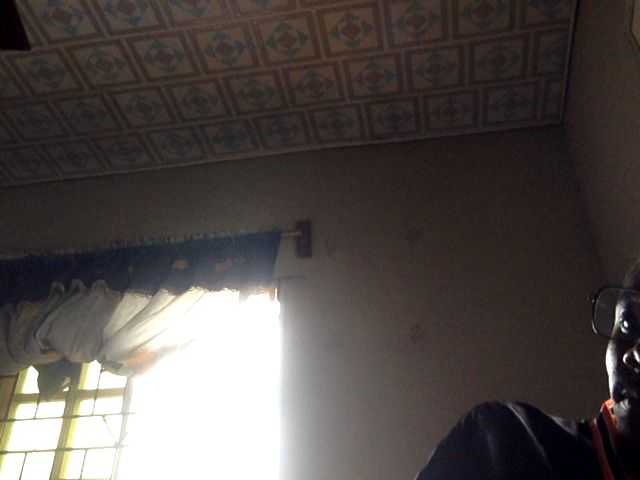
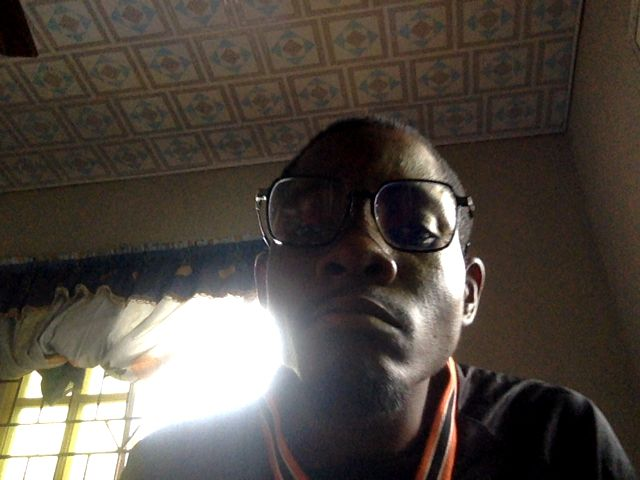
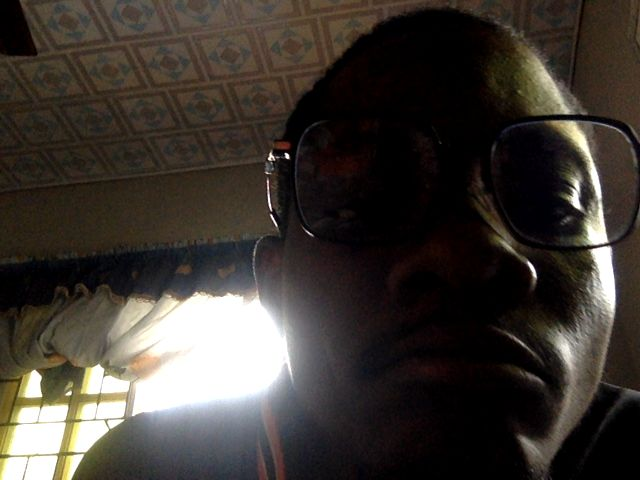
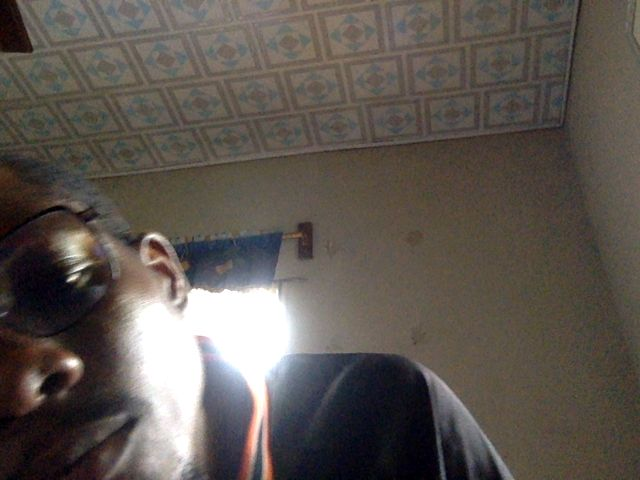
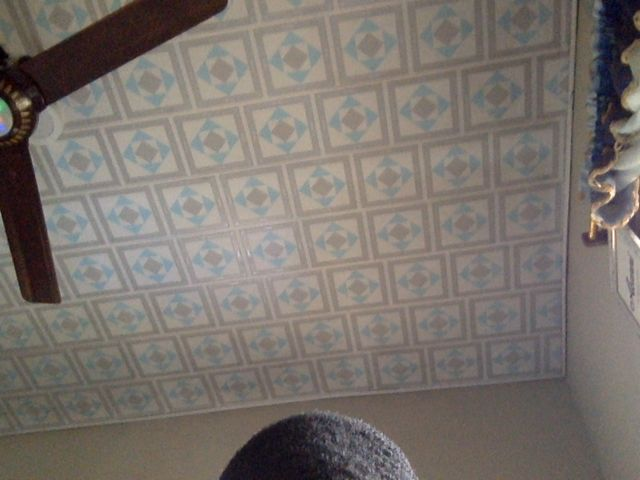
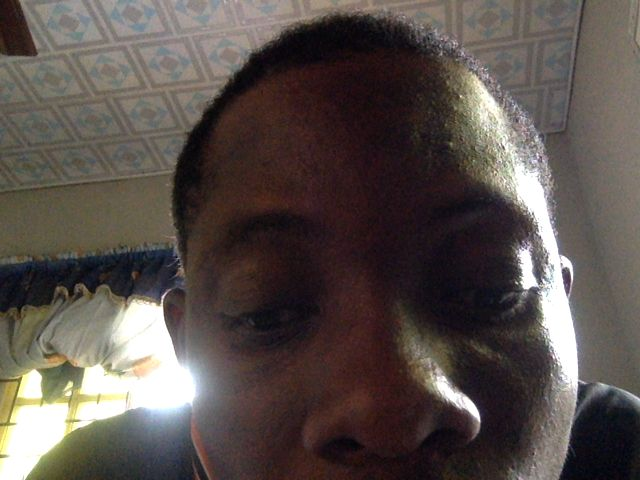
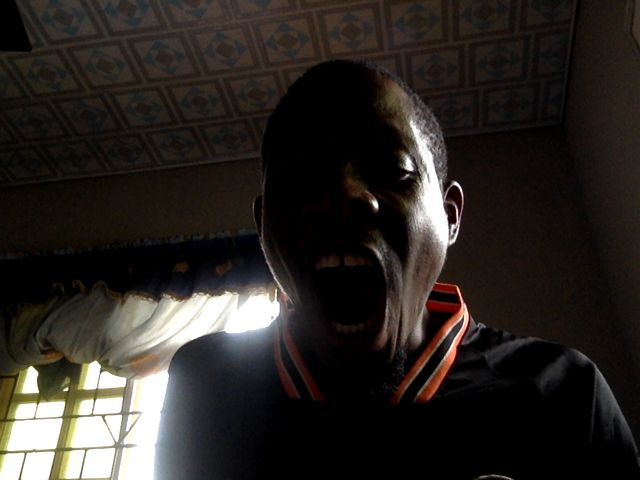
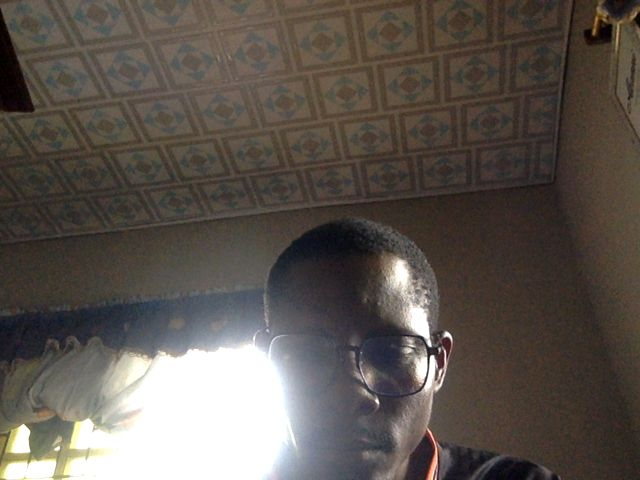
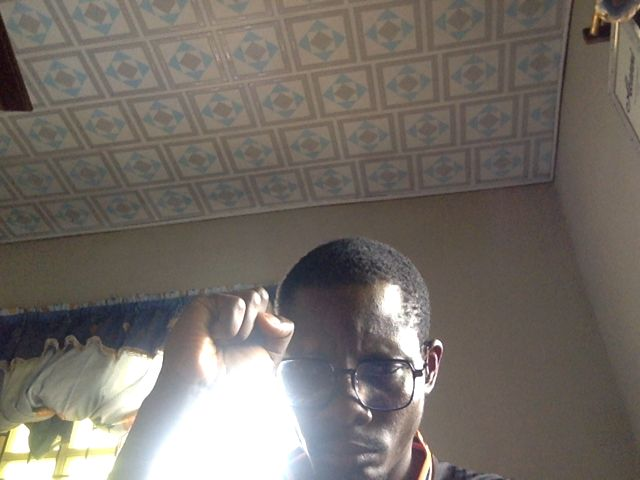
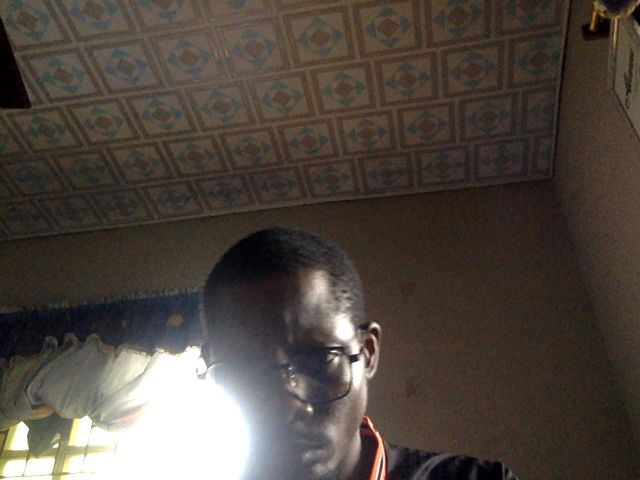
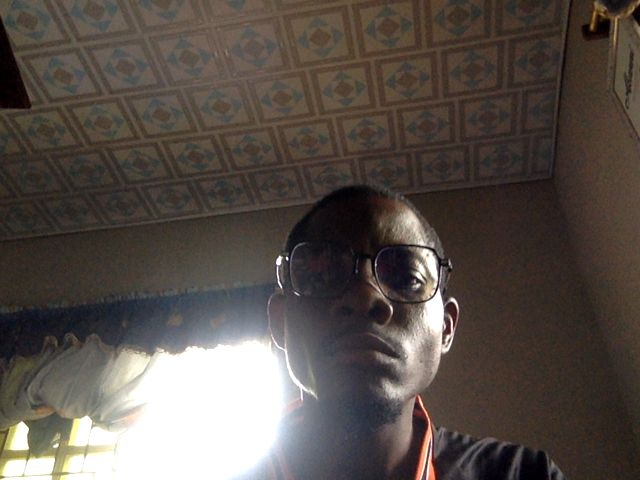
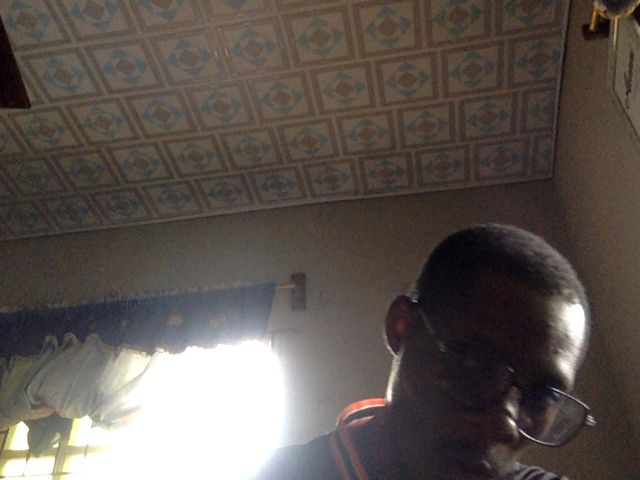
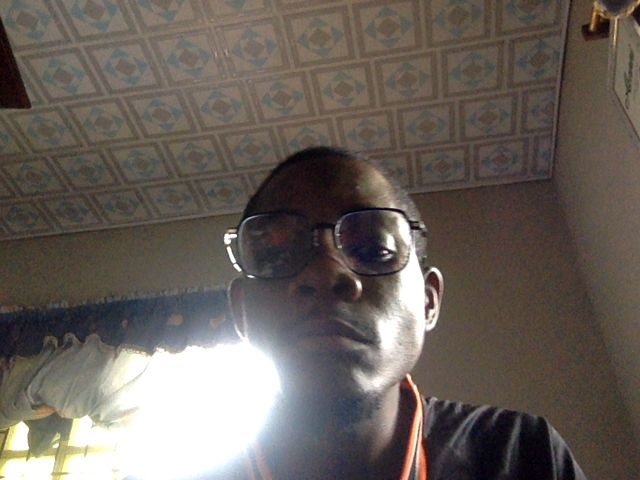
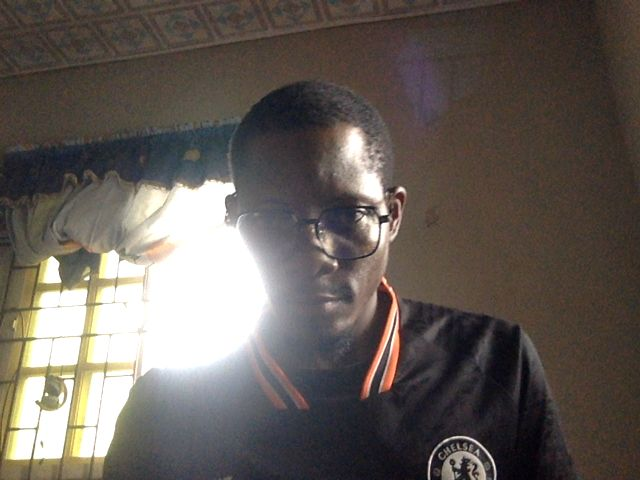
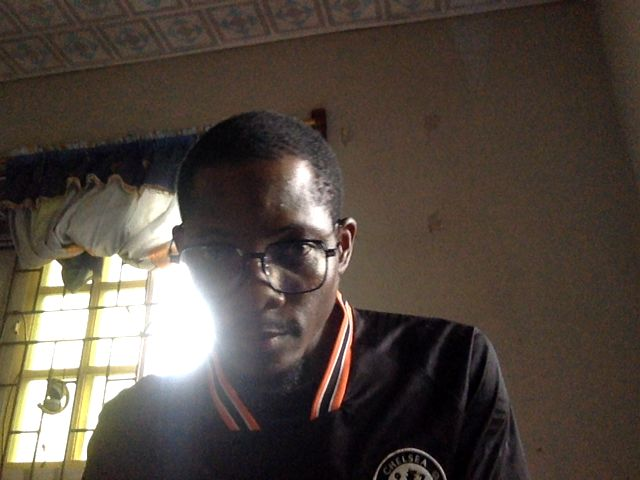
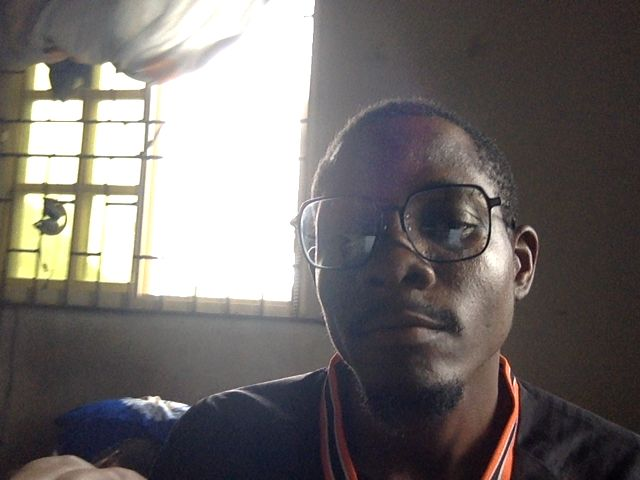
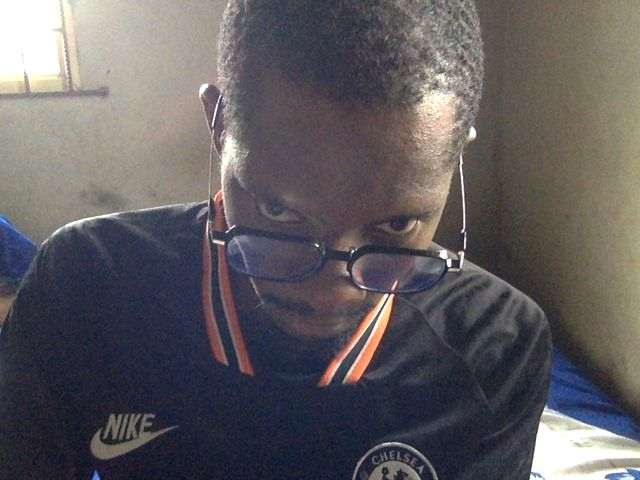
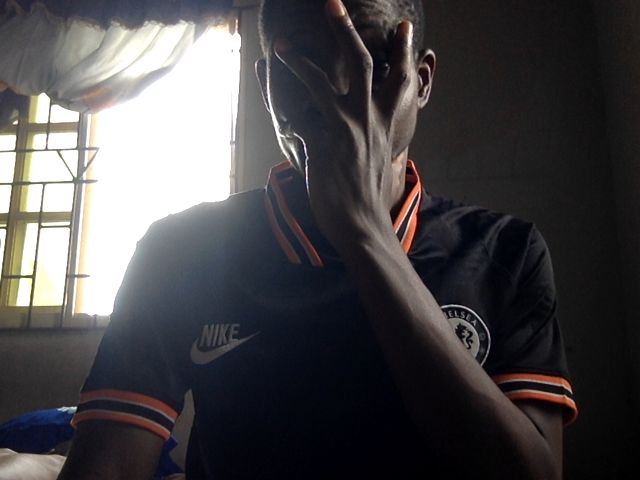
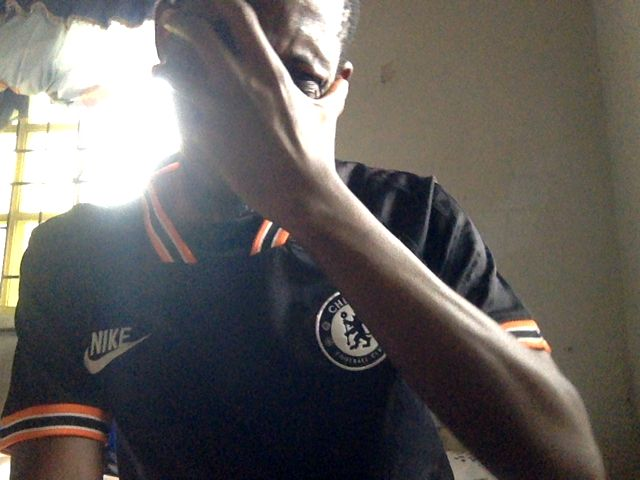
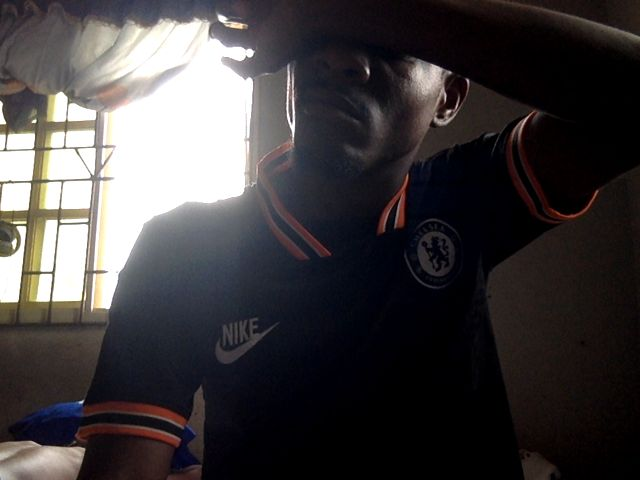
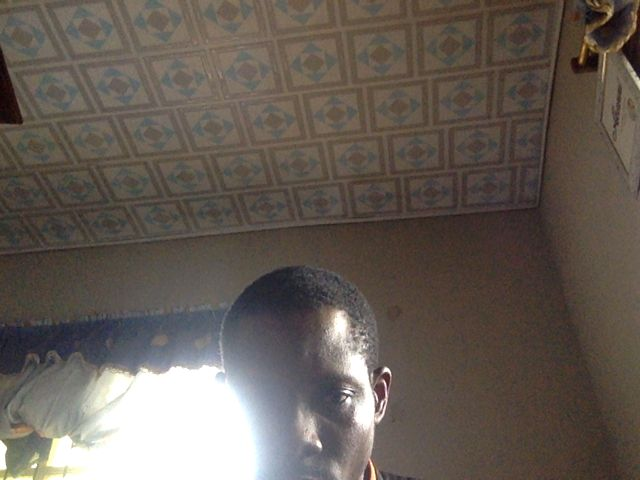
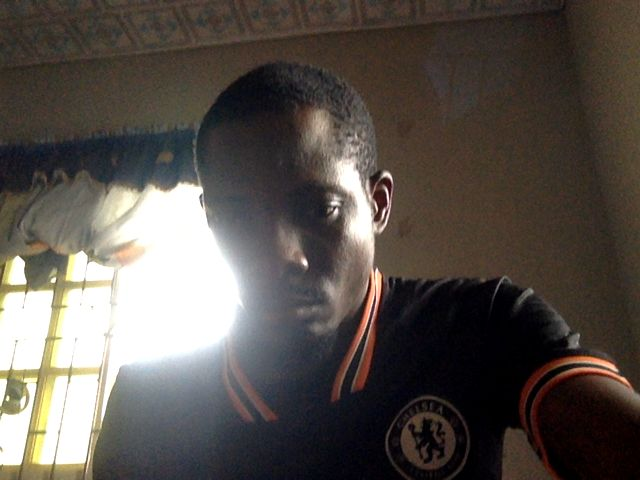
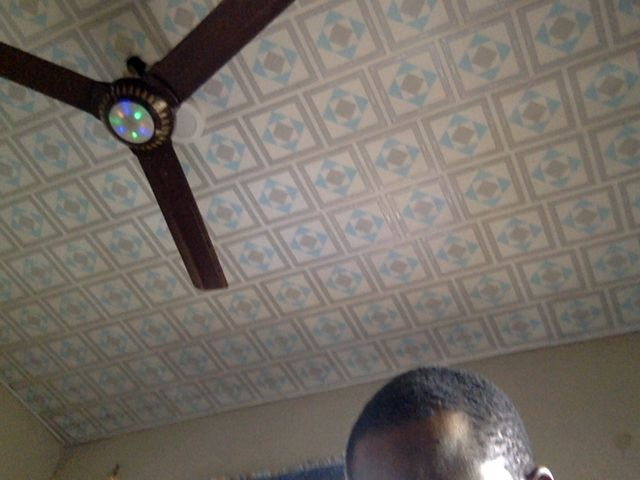
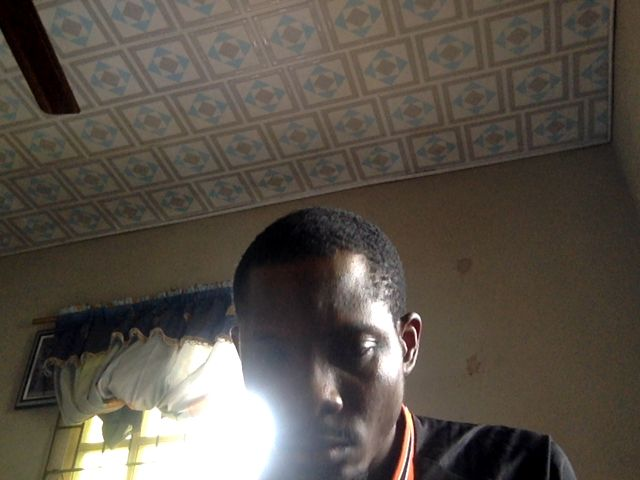
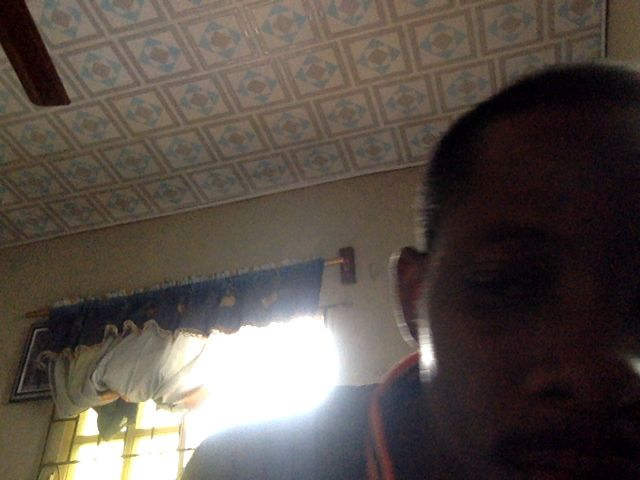
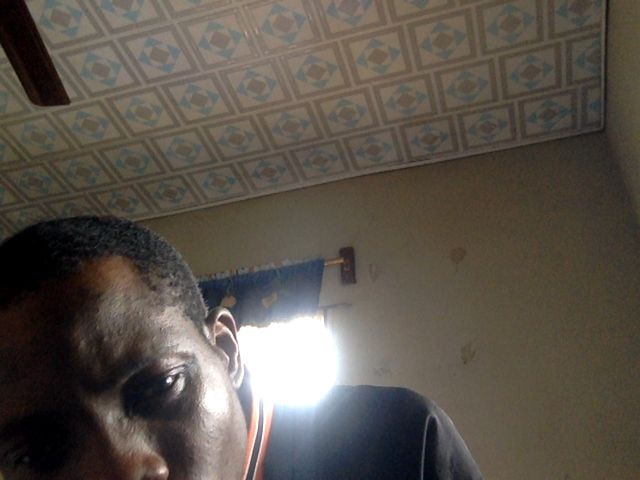
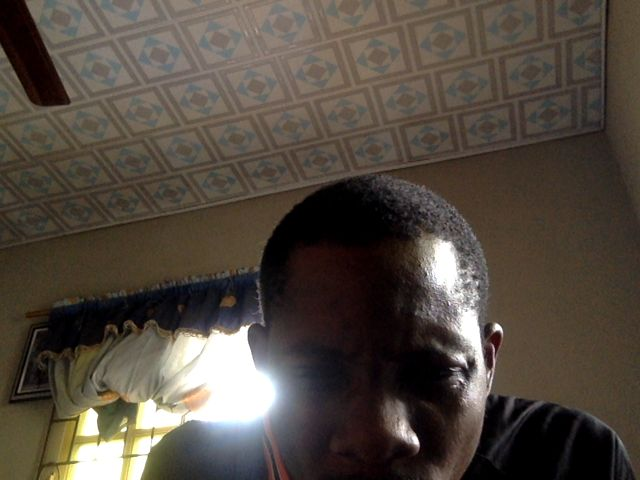
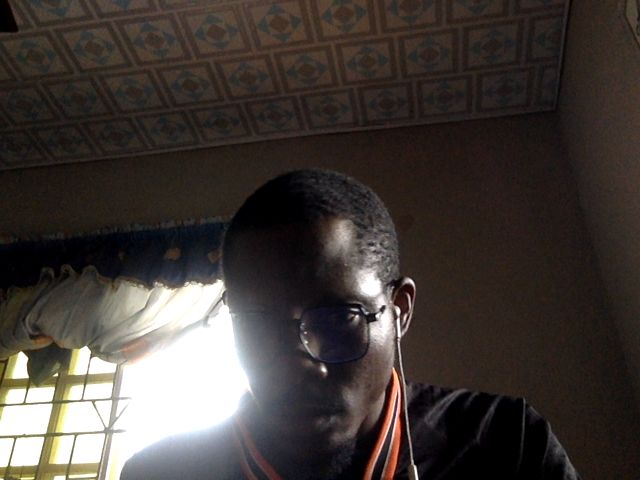
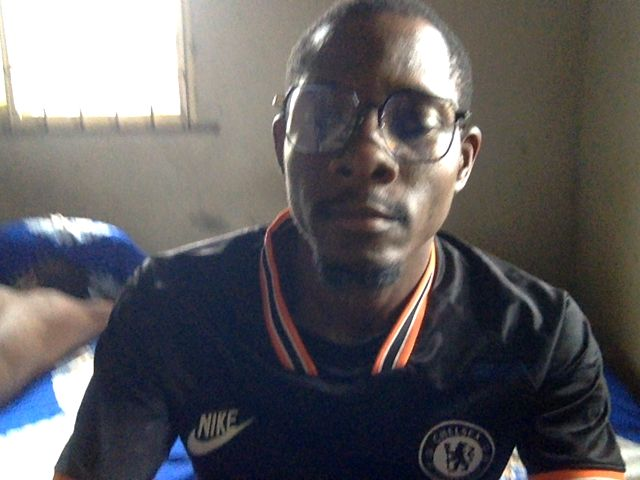
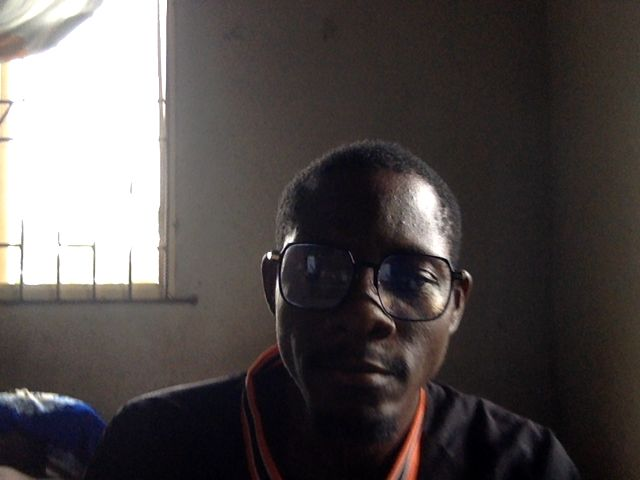
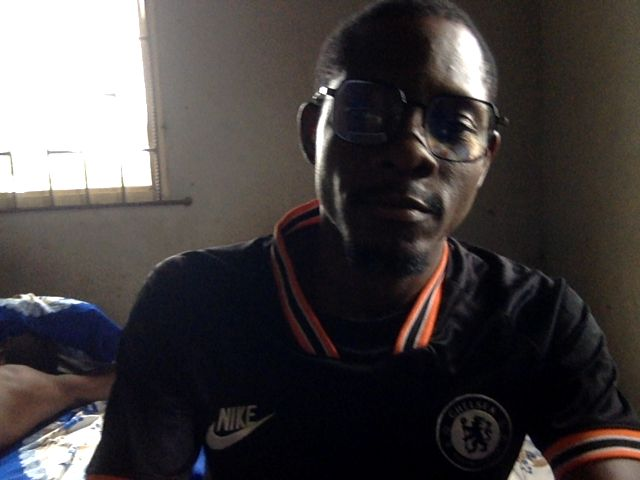
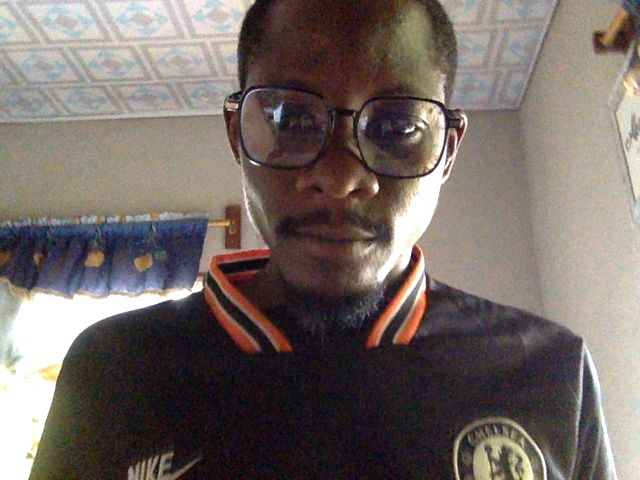
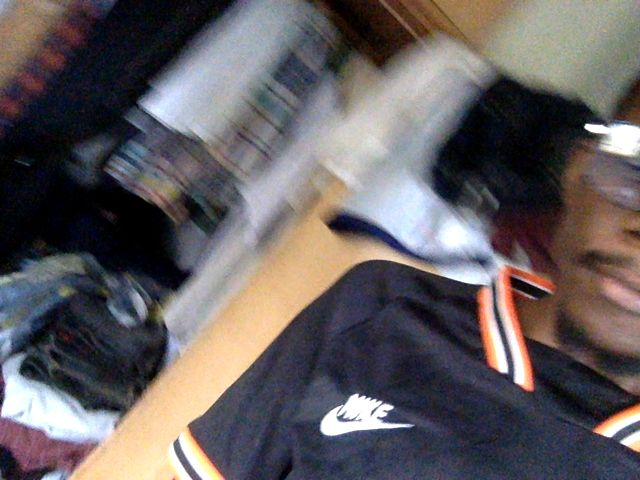
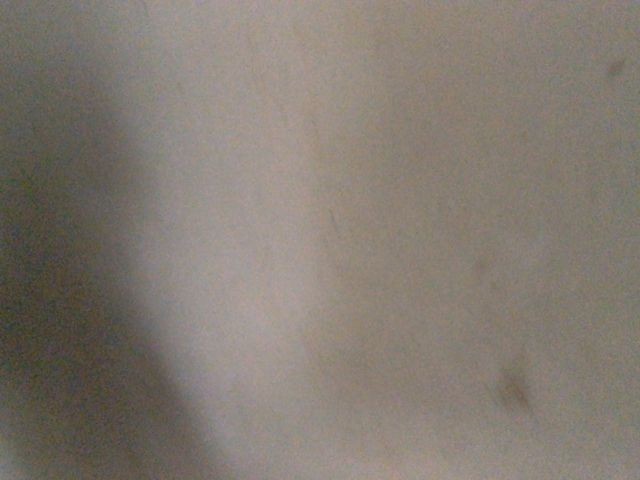
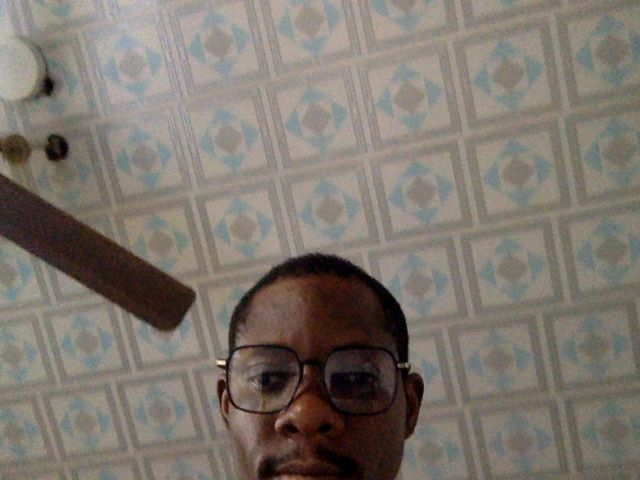
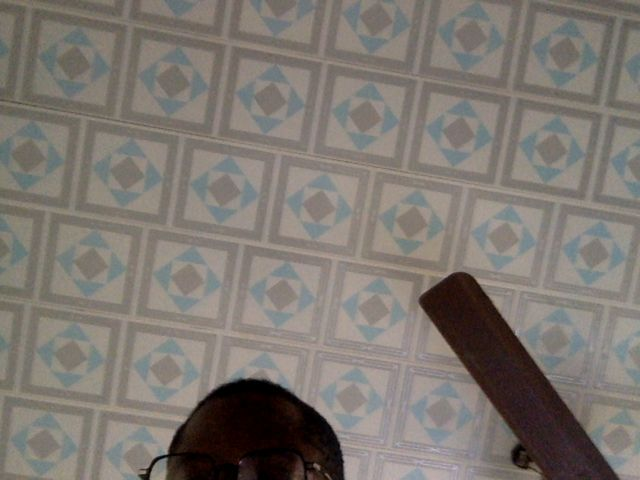
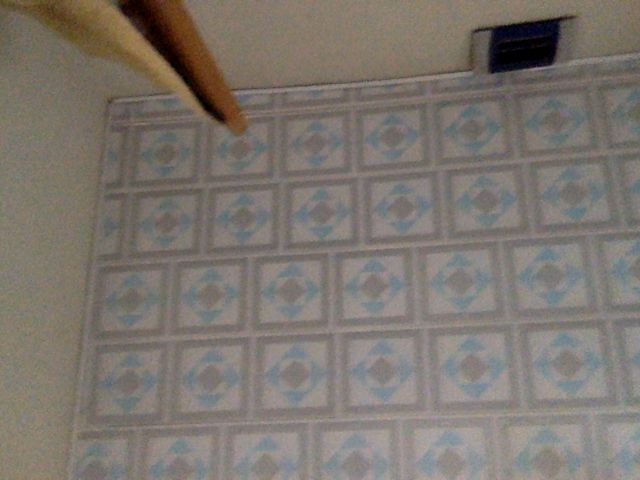
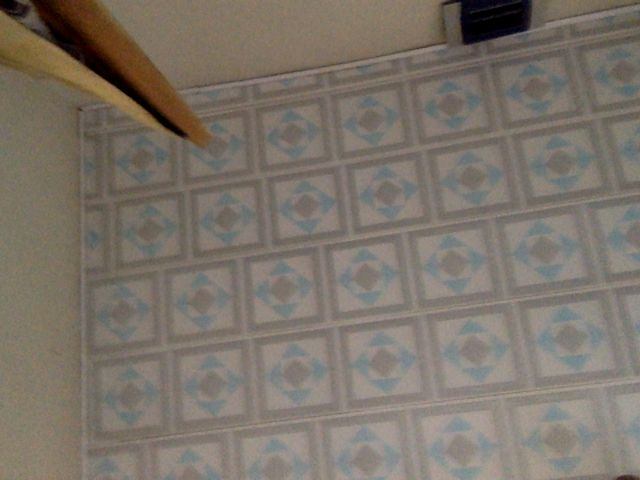
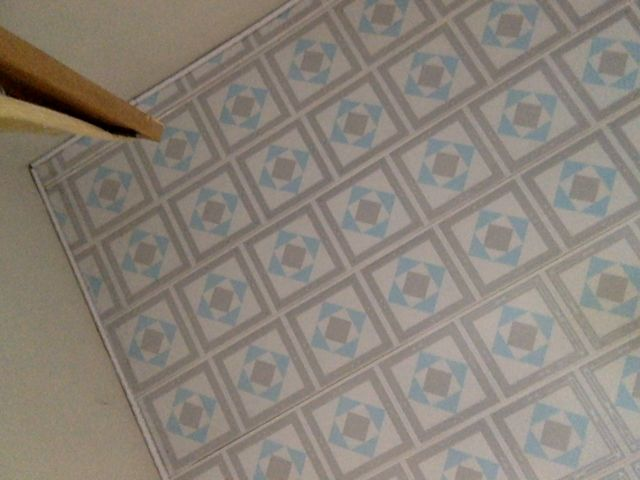
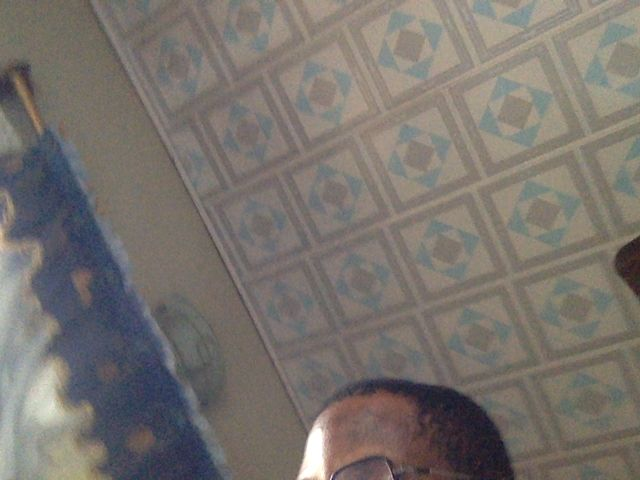
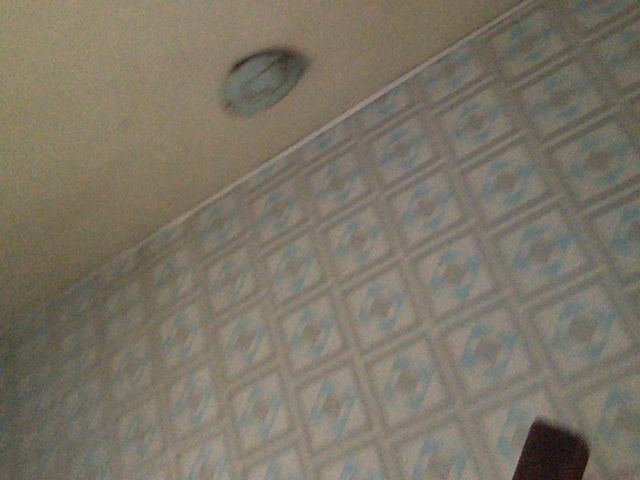
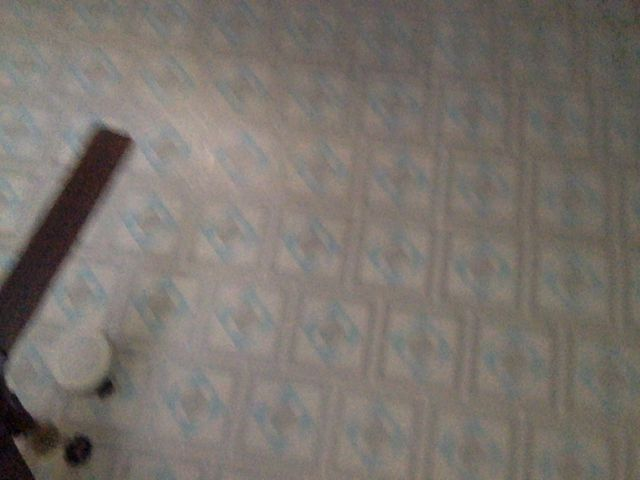
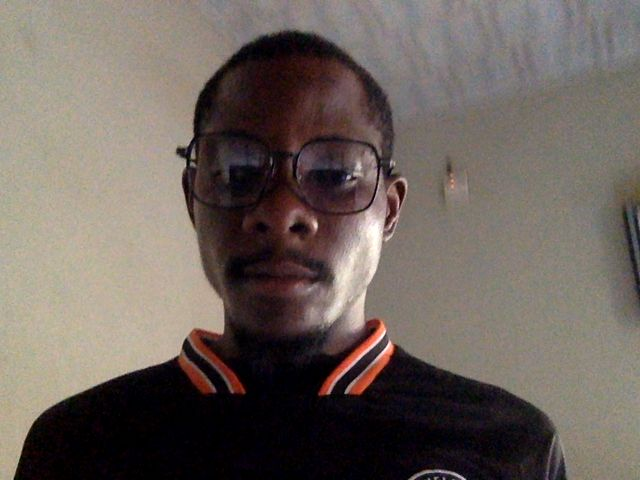
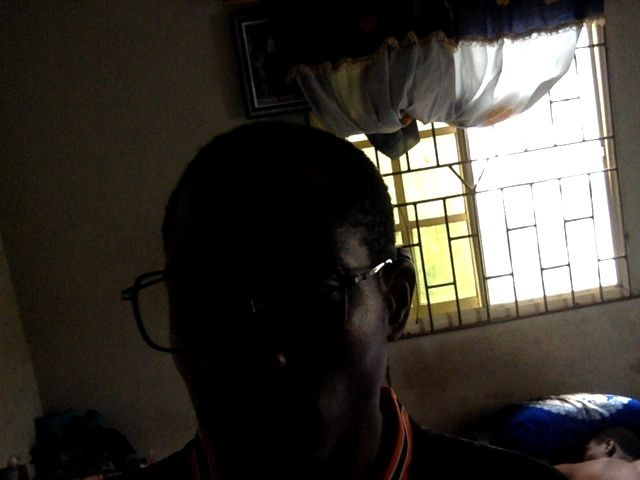
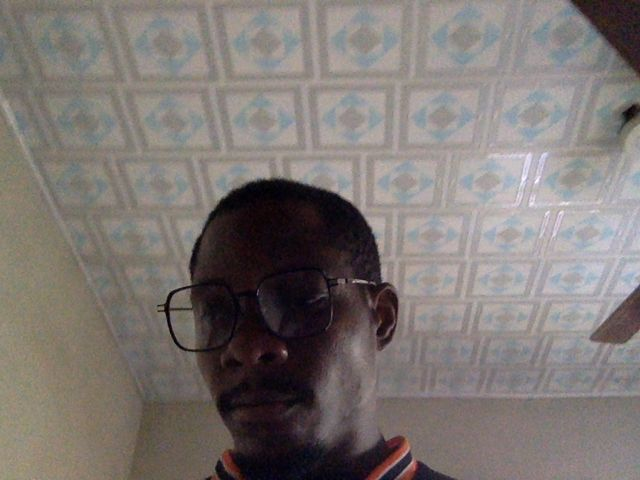
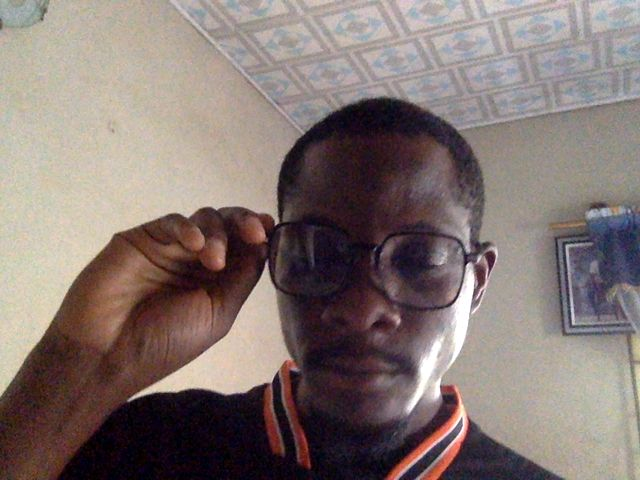
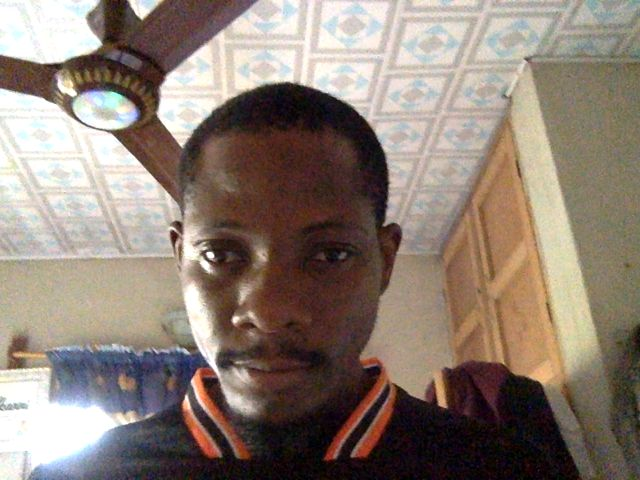
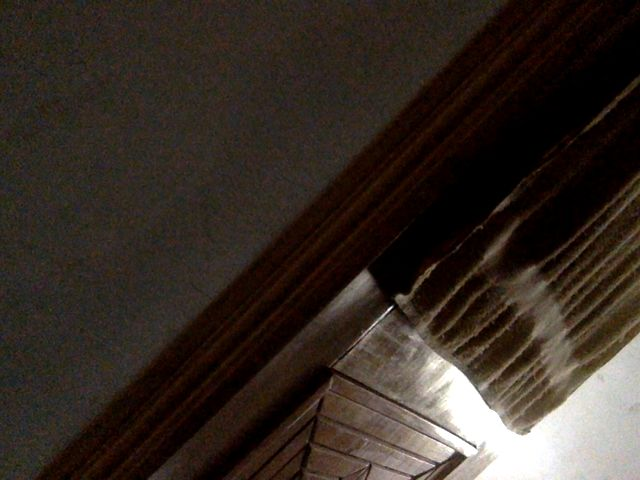
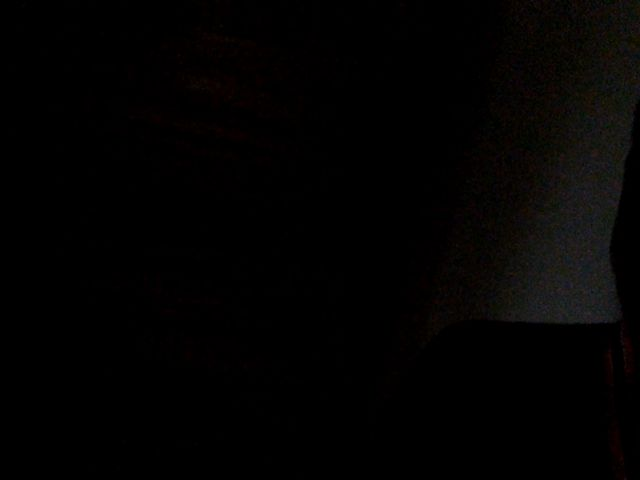
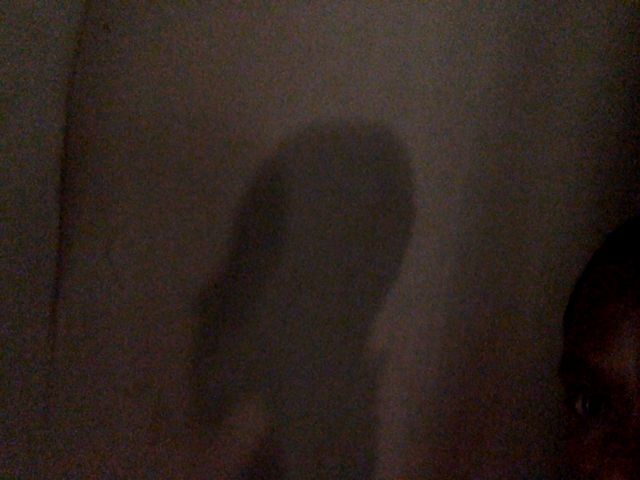
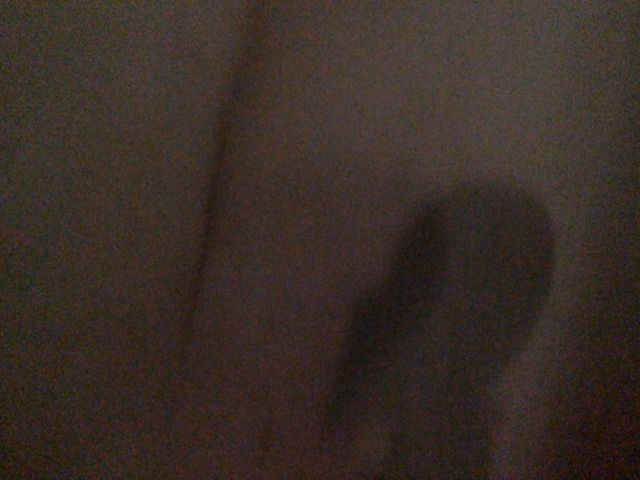
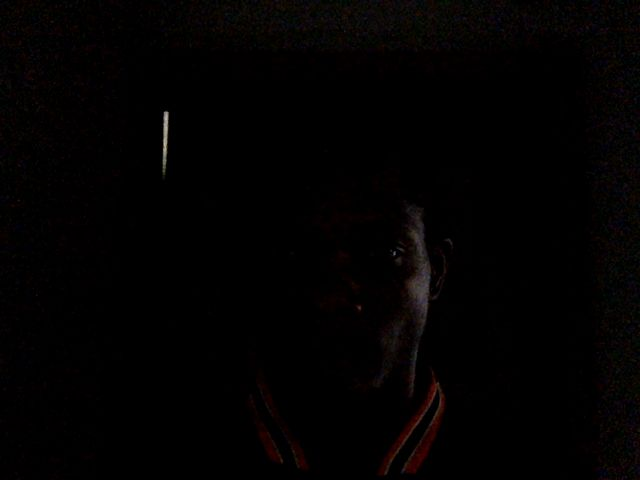
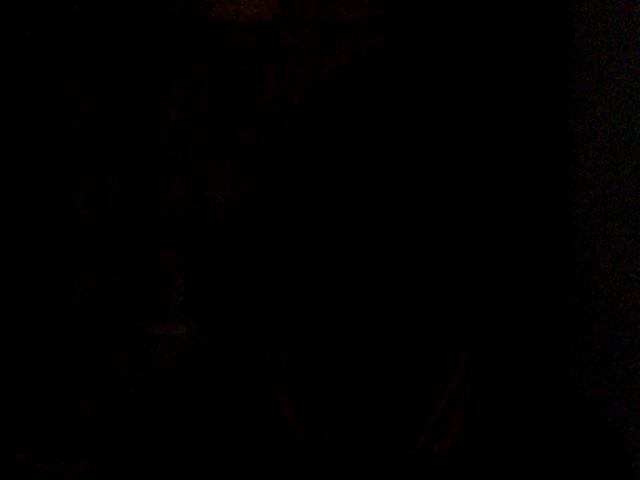
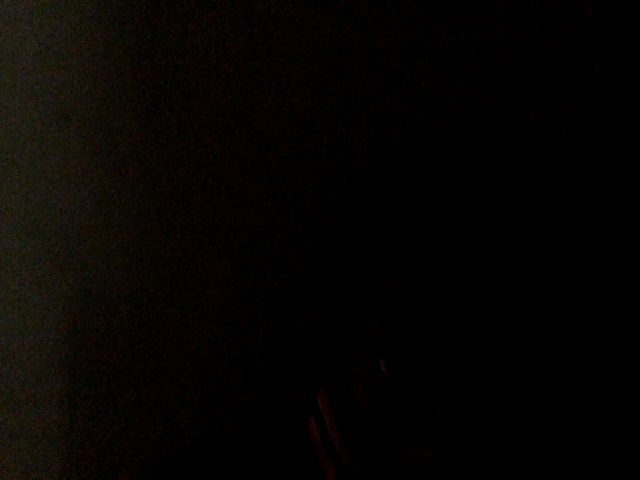
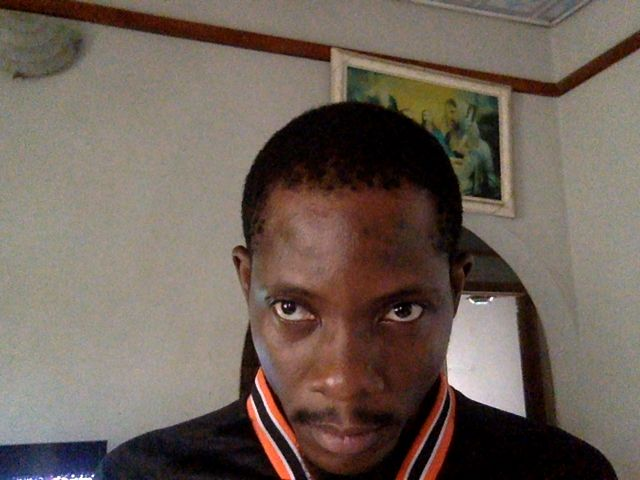
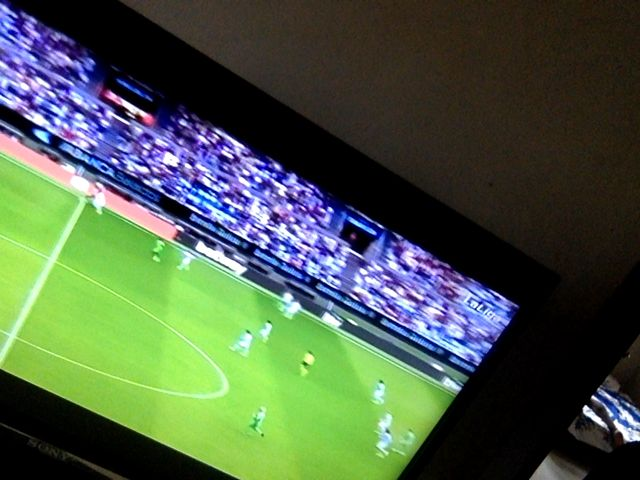
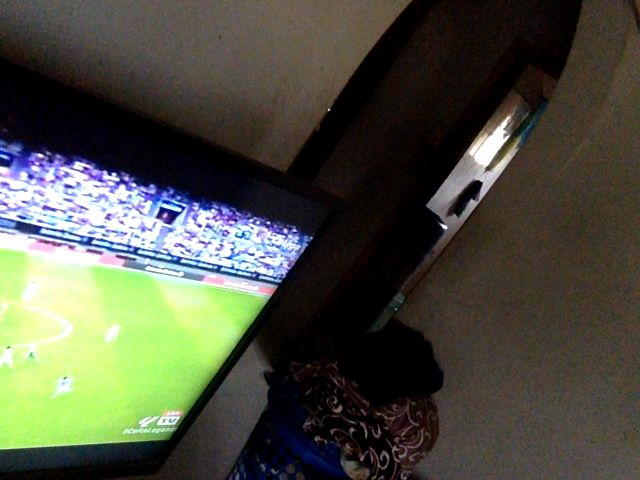
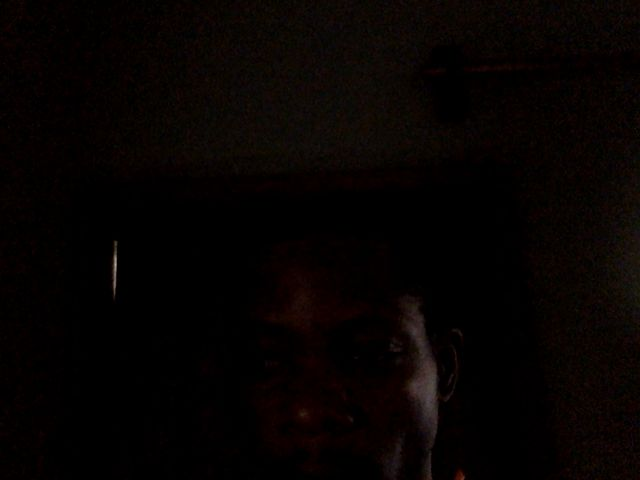
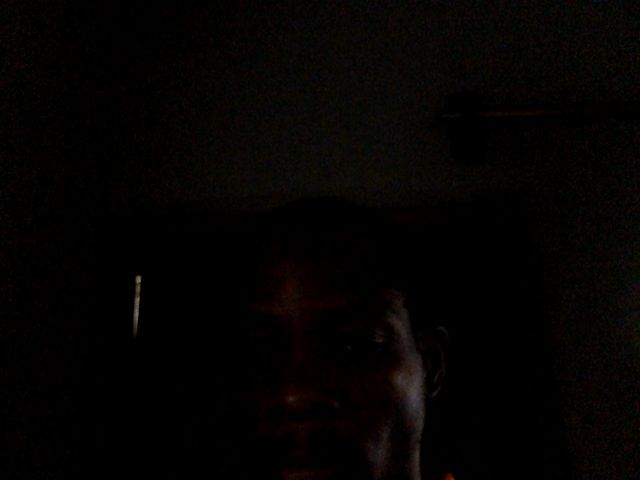
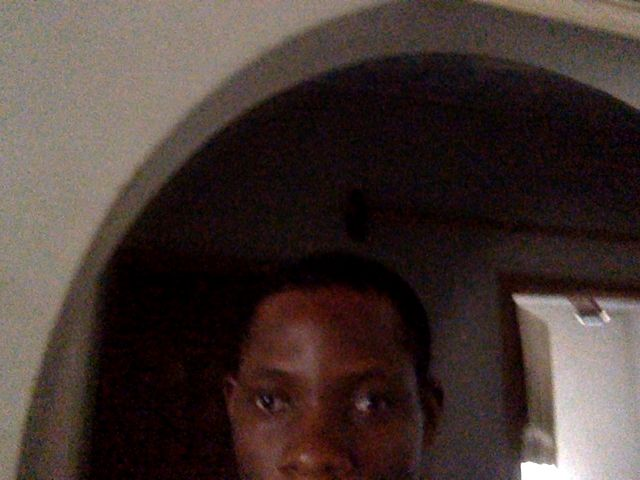
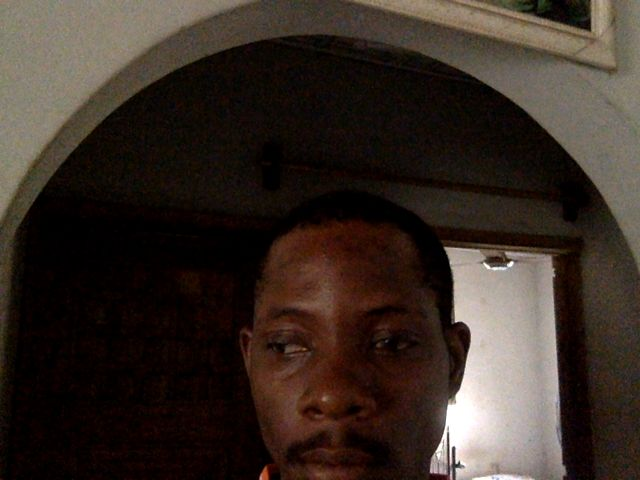
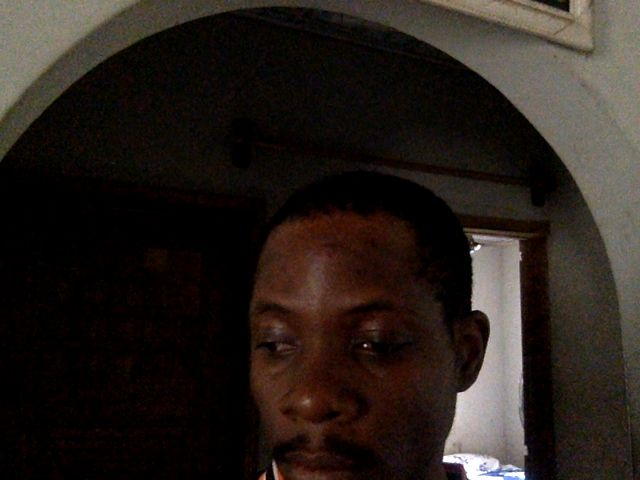
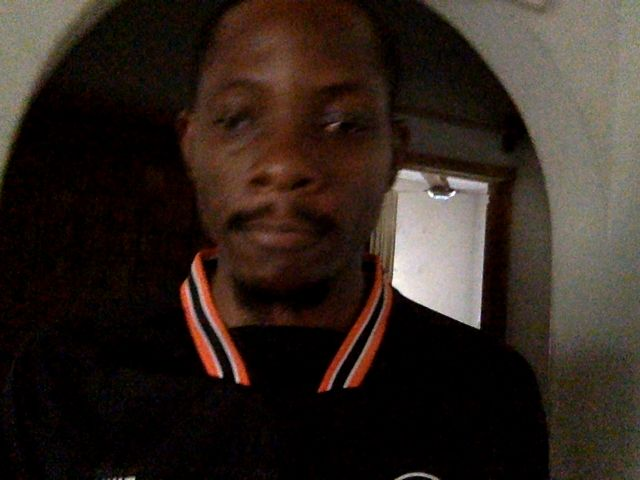
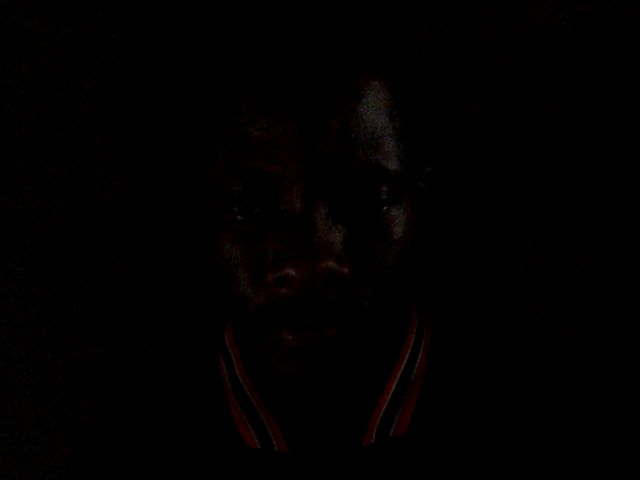
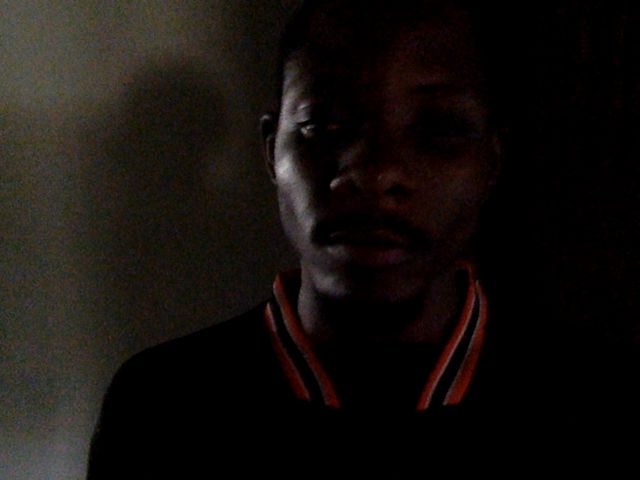
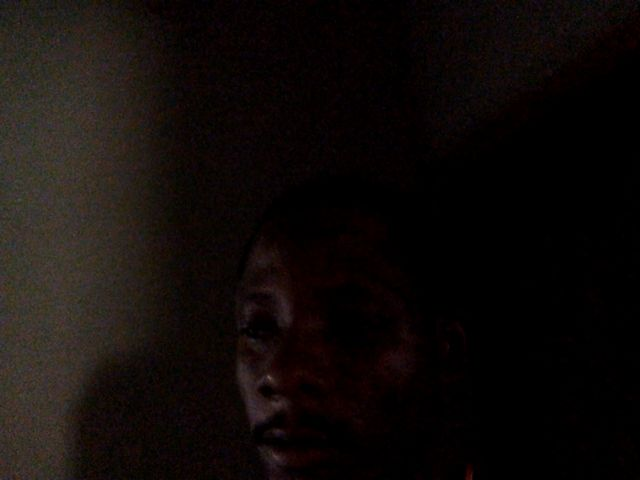
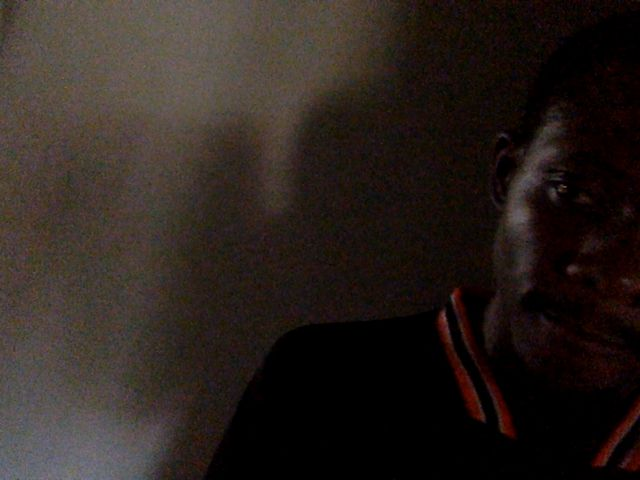
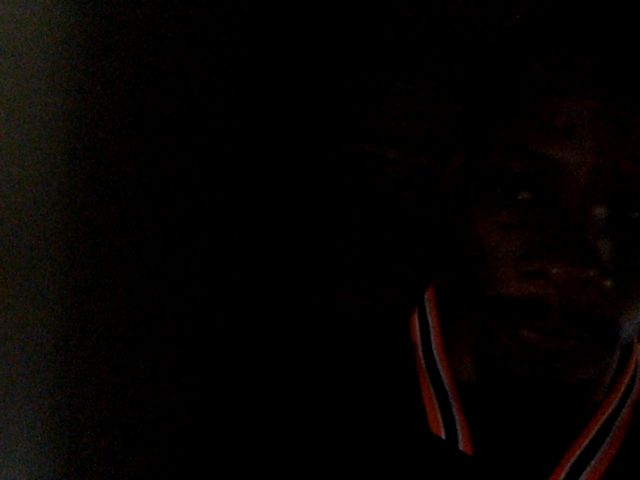
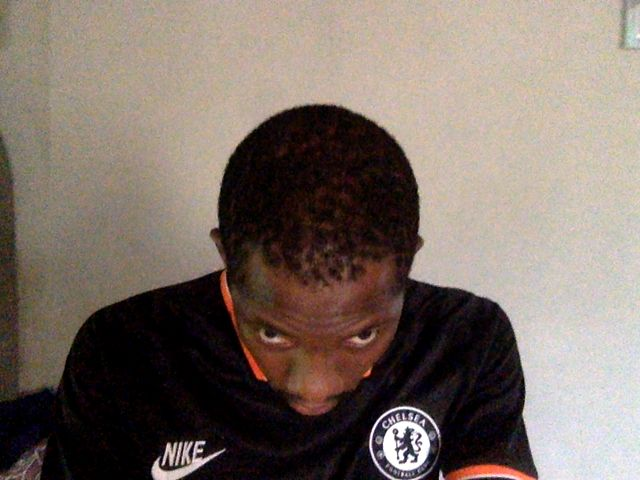
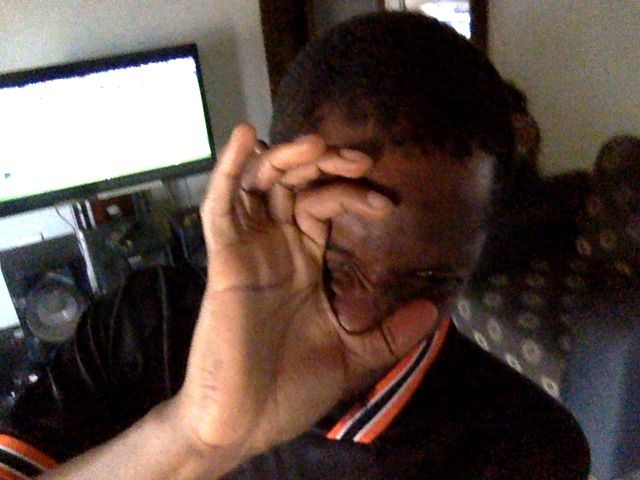
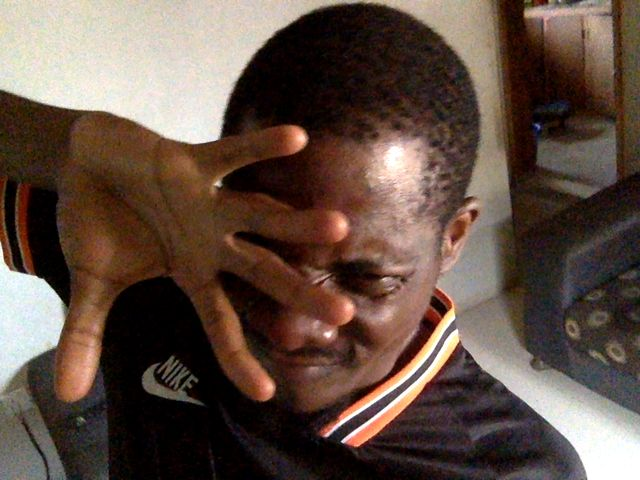
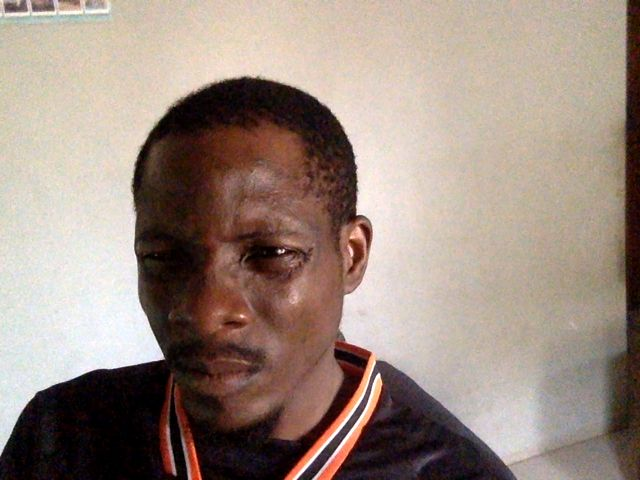
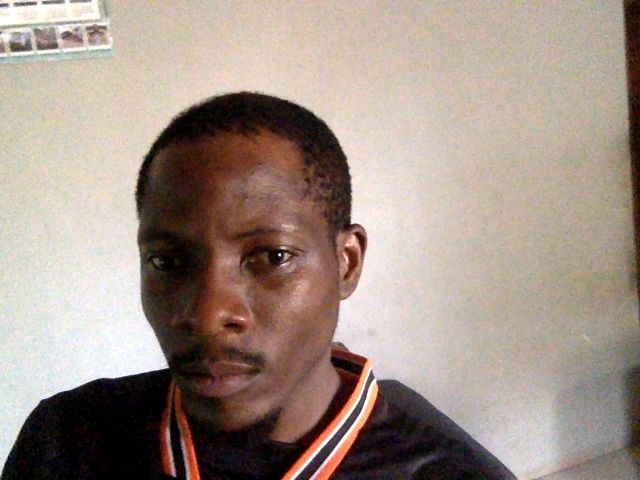
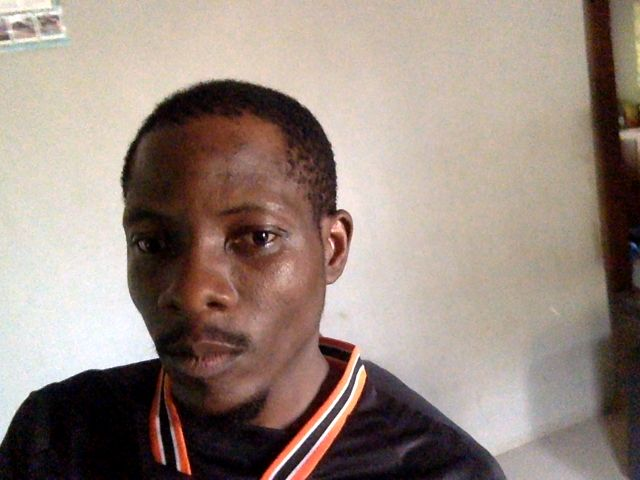
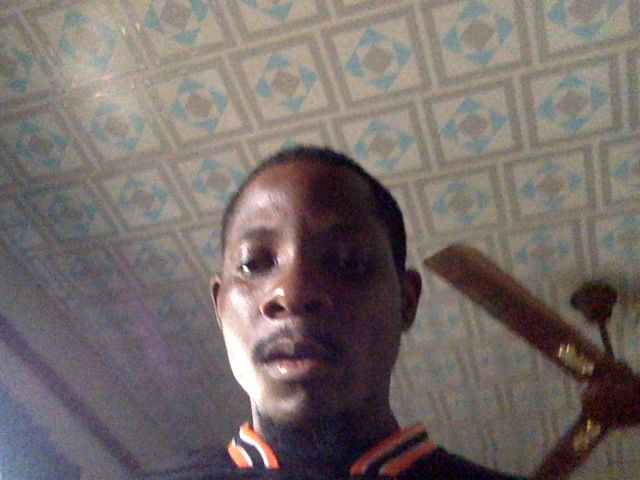
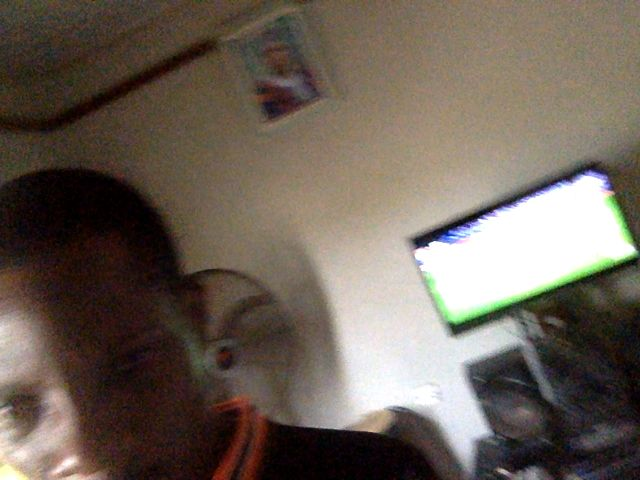

In [ ]:
#MULTIPLE RANDOM IMAGES CAPTURE

# JavaScript function to capture images automatically
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const video = document.createElement('video');
            video.style.display = 'block';
            document.body.appendChild(video);

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            await new Promise(resolve => setTimeout(resolve, 2000));  // Auto-capture after 2 sec

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            video.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)

    return filename

# Capture multiple images automatically
num_images = int(input("Enter the number of images to capture: "))

captured_images = []
for i in range(num_images):
    print(f"📸 Capturing image {i + 1}/{num_images}...")

    # Generate a random wait time (between 3 to 5 seconds)
    wait_time = random.uniform(2, 3)
    print(f"⏳ Waiting {wait_time:.2f} seconds before capturing...")
    time.sleep(wait_time)

    # Capture the image
    image_filename = os.path.join(IMAGES_PATH, f"{uuid.uuid1()}.jpg")
    captured_image = take_photo(image_filename)
    captured_images.append(captured_image)
    print(f"✅ Image {i+1} saved: {captured_image}")

print(f"\n🎯 {num_images} images successfully captured!")

# Function to convert image to Base64
def encode_image(image_path):
    with open(image_path, "rb") as img_file:
        return b64encode(img_file.read()).decode()

# Function to display images as thumbnails
def display_images(image_folder, max_width=100):
    image_files = glob.glob(f"{image_folder}/*.jpg")

    if not image_files:
        print("No images found.")
        return

    # Convert each image to a base64 string
    image_tags = ''.join(
        f'<img src="data:image/jpeg;base64,{encode_image(img)}" width="{max_width}px" style="margin:5px; border-radius:10px;">'
        for img in image_files
    )

    display(HTML(f'<div style="display:flex; flex-wrap:wrap;">{image_tags}</div>'))

# Show all captured images as thumbnails
display_images(IMAGES_PATH)

In [ ]:
!labelme

2025-03-09 10:43:43.821 | INFO     | labelme.config:get_config:66 - Loading config file from: /root/.labelmerc
QObject::moveToThread: Current thread (0x19448f0) is not the object's thread (0x2e5c320).
Cannot move to target thread (0x19448f0)

qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.11/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb, eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, wayland-egl, wayland, wayland-xcomposite-egl, wayland-xcomposite-glx, webgl.



In [ ]:
images = tf.data.Dataset.list_files('/content/drive/MyDrive/face_detection/images/*.jpg')

In [ ]:
images.as_numpy_iterator().next()

In [7]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
images = images.map(load_image)

array([[[108, 103,  84],
        [109, 104,  85],
        [110, 107,  90],
        ...,
        [140, 141, 133],
        [139, 136, 129],
        [144, 141, 134]],

       [[108, 103,  84],
        [110, 105,  86],
        [110, 107,  90],
        ...,
        [140, 140, 132],
        [139, 136, 129],
        [144, 141, 134]],

       [[110, 105,  86],
        [112, 107,  88],
        [111, 108,  91],
        ...,
        [143, 139, 130],
        [140, 136, 127],
        [145, 141, 132]],

       ...,

       [[176, 183, 175],
        [172, 179, 171],
        [167, 175, 164],
        ...,
        [ 94,  93,  73],
        [ 95,  92,  73],
        [ 94,  93,  73]],

       [[178, 185, 177],
        [173, 180, 172],
        [167, 174, 166],
        ...,
        [ 94,  96,  75],
        [ 95,  94,  74],
        [ 91,  93,  72]],

       [[181, 188, 180],
        [175, 182, 174],
        [168, 175, 167],
        ...,
        [ 96,  98,  77],
        [ 93,  95,  74],
        [ 91,  93,  72]]], dtype=uint8)
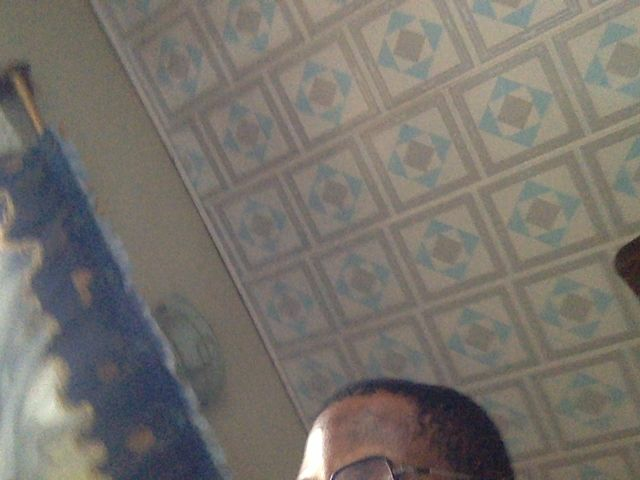

In [ ]:
images.as_numpy_iterator().next()

In [ ]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

View Raw Images with matplotlib

In [ ]:
image_generator = images.batch(4).as_numpy_iterator()

In [ ]:
plot_images = image_generator.next()

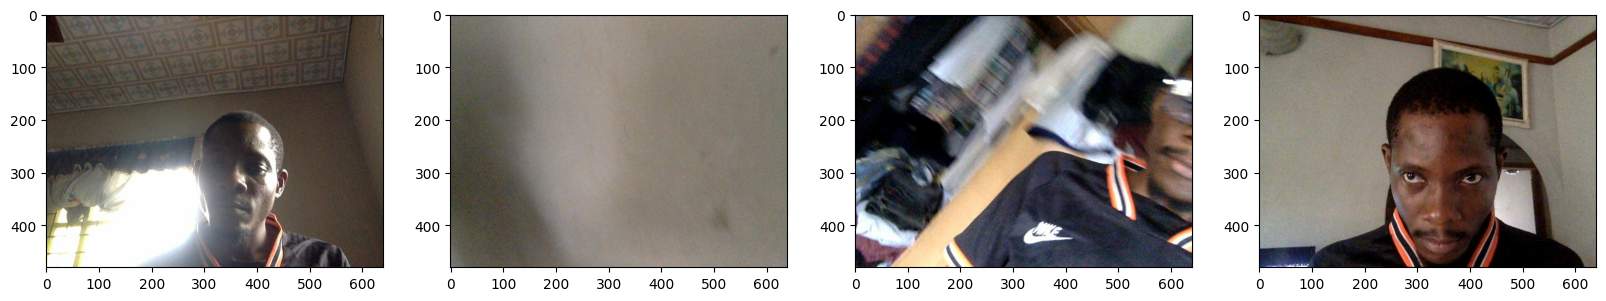

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

#SPLIT DATA INTO TRAIN(70), TEST (14) AND VAL(13) FOLDERS
#THEN MOVE MATCHING LABELS

In [ ]:
#Move matching labels

BASE_PATH = '/content/drive/MyDrive/face_detection'
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join(BASE_PATH, folder, 'images')):

        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join(BASE_PATH,'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join(BASE_PATH,folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)
            print(f"Moved: {existing_filepath} → {new_filepath}")

#Using Albumentations to apply Image Augmentation on Images and Labels

In [ ]:
import albumentations as alb

In [ ]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels']))

In [ ]:
img = cv2.imread(os.path.join(BASE_PATH,'train', 'images','0f760d42-fcce-11ef-8904-0242ac1c000c.jpg'))
print(img)

[[[ 16   9  30]
  [ 15   8  29]
  [ 15   8  29]
  ...
  [ 90 105 124]
  [ 89 104 123]
  [ 92 107 126]]

 [[ 15   8  29]
  [ 14   7  28]
  [ 14   7  28]
  ...
  [ 93 108 127]
  [ 92 107 126]
  [ 95 110 129]]

 [[ 13   9  28]
  [ 13   9  28]
  [ 13   8  29]
  ...
  [ 91 107 124]
  [ 90 105 124]
  [ 92 107 126]]

 ...

 [[248 255 255]
  [248 255 255]
  [251 255 255]
  ...
  [ 46  57  71]
  [ 45  56  70]
  [ 43  54  68]]

 [[246 255 255]
  [248 255 255]
  [251 255 255]
  ...
  [ 46  57  71]
  [ 47  58  72]
  [ 47  58  72]]

 [[246 255 255]
  [248 255 255]
  [250 255 255]
  ...
  [ 46  57  71]
  [ 49  60  74]
  [ 50  61  75]]]


In [ ]:
with open(os.path.join(BASE_PATH, 'train', 'labels', '0f760d42-fcce-11ef-8904-0242ac1c000c.json'), 'r') as f:
    label = json.load(f)

In [ ]:
label

{'version': '5.7.0',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[352.9861111111111, 184.79166666666666],
    [597.4305555555555, 431.31944444444446]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None}],
 'imagePath': '../images/0f760d42-fcce-11ef-8904-0242ac1c000c.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnL

In [ ]:
label

{'version': '5.7.0',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[352.9861111111111, 184.79166666666666],
    [597.4305555555555, 431.31944444444446]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None}],
 'imagePath': '../images/0f760d42-fcce-11ef-8904-0242ac1c000c.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnL

In [ ]:
type(label)

dict

In [ ]:
label['shapes'][0]['label']

'face'

In [ ]:
label['shapes'][0]['points']

[[352.9861111111111, 184.79166666666666],
 [597.4305555555555, 431.31944444444446]]

Extract Coordinates and rescale to match image resolution

In [ ]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [ ]:
coords

[352.9861111111111, 184.79166666666666, 597.4305555555555, 431.31944444444446]

In [ ]:
coords = list(np.divide(coords, [640,480,640,480]))

In [ ]:
coords

[0.551540798611111, 0.3849826388888889, 0.9334852430555556, 0.8985821759259259]

Apply Augmentations and Query Results

In [ ]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [ ]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [ ]:
augmented['bboxes'][0][2:]

[1.0, 0.8984876378377279]

In [ ]:
augmented['bboxes']

[[0.7133024597167968, 0.35064815521240233, 1.0, 0.8984876378377279]]

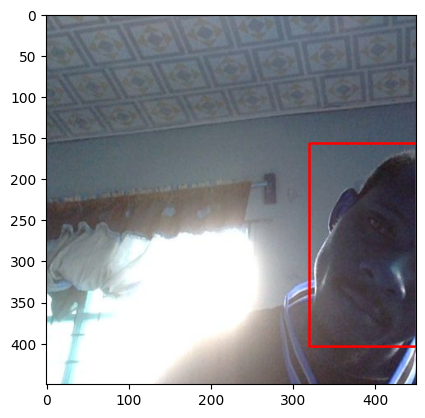

In [ ]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
                    (255,0,0), 2)

plt.imshow(augmented['image'])

#Build and Run Augmentation Pipeline

In [ ]:
AUGMENTED_PATH = '/content/drive/MyDrive/face_detection/augmented_data'

for partition in ['train','test','val']:
    for image in os.listdir(os.path.join(BASE_PATH, partition, 'images')):
        img = cv2.imread(os.path.join(BASE_PATH, partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join(BASE_PATH, partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join(AUGMENTED_PATH, partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0


                with open(os.path.join(AUGMENTED_PATH, partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

Load Augmented Images to Tensorflow Dataset

In [8]:
train_images = tf.data.Dataset.list_files('/content/drive/MyDrive/face_detection/augmented_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [9]:
test_images = tf.data.Dataset.list_files('/content/drive/MyDrive/face_detection/augmented_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [10]:
val_images = tf.data.Dataset.list_files('/content/drive/MyDrive/face_detection/augmented_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [11]:
train_images.as_numpy_iterator().next()

array([[[0.99699754, 0.99852943, 0.98719364],
        [1.        , 1.        , 0.99509805],
        [1.        , 1.        , 1.        ],
        ...,
        [0.41299018, 0.3973039 , 0.3855392 ],
        [0.38952205, 0.37726715, 0.39736518],
        [0.08541667, 0.07702206, 0.11629902]],

       [[0.99626225, 0.99626225, 0.99693626],
        [1.        , 1.        , 0.99914217],
        [1.        , 1.        , 0.9990196 ],
        ...,
        [0.40741423, 0.38388482, 0.38388482],
        [0.41060048, 0.38235295, 0.41219363],
        [0.09105392, 0.06458333, 0.11017157]],

       [[0.9927696 , 0.9954044 , 0.966299  ],
        [0.99699754, 1.        , 0.9783088 ],
        [0.9965686 , 0.9965686 , 0.9887255 ],
        ...,
        [0.3893995 , 0.3658701 , 0.37371323],
        [0.42892158, 0.39166668, 0.42150736],
        [0.16041666, 0.1264706 , 0.17450981]],

       ...,

       [[0.34154412, 0.31115195, 0.27340686],
        [0.33884802, 0.29963234, 0.26433823],
        [0.38878676, 0

#Prepare Labels

In [12]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)

    return [label['class']], label['bbox']

Load Labels to Tensorflow Dataset

In [13]:
train_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/face_detection/augmented_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [14]:
test_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/face_detection/augmented_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [15]:
val_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/face_detection/augmented_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [16]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.4329 , 0.04233, 0.848  , 0.592  ], dtype=float16))

#Combine Loaded Images and Labels

In [17]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 900, 900, 720, 720)

Creating Final Datasets

In [18]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [19]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(5000)
test = test.batch(8)
test = test.prefetch(4)

In [20]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(5000)
val = val.batch(8)
val = val.prefetch(4)

In [21]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.1211, 0.3594, 0.604 , 0.918 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.2817, 0.3018, 0.777 , 0.8896],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.1119, 0.2206, 0.6367, 0.8936],
        [0.    , 0.2207, 0.4626, 0.8906],
        [0.0777, 0.5586, 0.5234, 1.    ]], dtype=float16))

View Images and Annotations

In [21]:
data_samples = train.as_numpy_iterator()

In [22]:
res = data_samples.next()

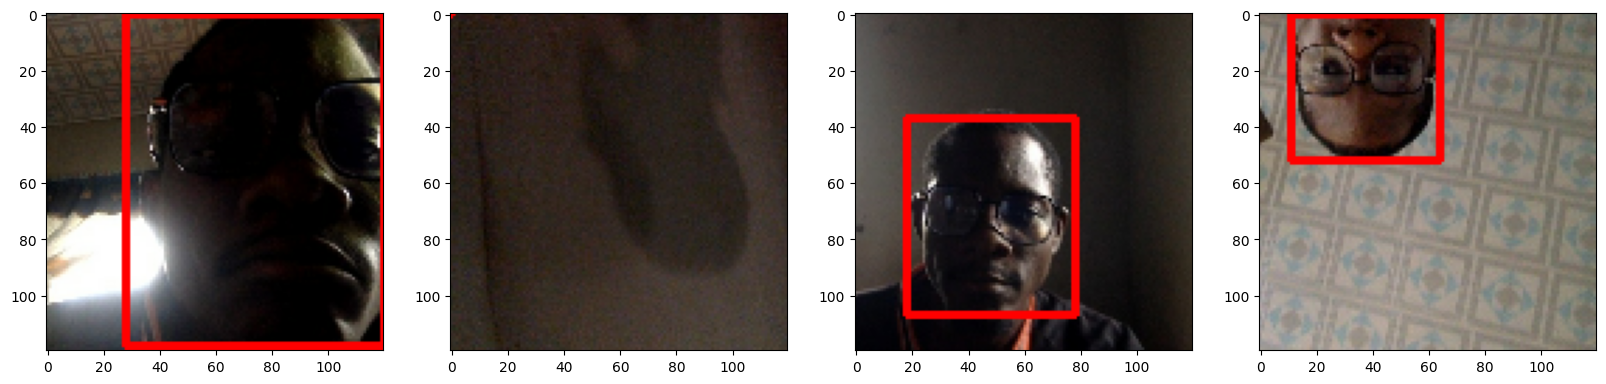

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    sample_image = sample_image.copy()
    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

#Build Deep Learning

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

Download and Summarize VGG

In [25]:
vgg = VGG16(include_top=False)

In [26]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

Build Neural Network instance

In [27]:
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

Test out Neural Network

In [28]:
facetracker = build_model()

In [29]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [30]:
X, y = train.as_numpy_iterator().next()

In [31]:
X.shape

(8, 120, 120, 3)

In [34]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 979ms/step


In [35]:
classes, coords

(array([[0.5853874 ],
        [0.6045581 ],
        [0.61434865],
        [0.57881063],
        [0.6118502 ],
        [0.58903044],
        [0.54271024],
        [0.72302383]], dtype=float32),
 array([[0.35439247, 0.5682993 , 0.56453484, 0.47894517],
        [0.41959372, 0.6067503 , 0.5565124 , 0.58848184],
        [0.40720934, 0.62414026, 0.59018266, 0.59058857],
        [0.32861966, 0.63731515, 0.64650434, 0.59094614],
        [0.37258023, 0.5841652 , 0.5669037 , 0.5354565 ],
        [0.39011785, 0.6017726 , 0.5714997 , 0.5430592 ],
        [0.44934154, 0.585953  , 0.5366222 , 0.5748557 ],
        [0.3532662 , 0.7388831 , 0.68307555, 0.4651208 ]], dtype=float32))

#Define Losses and Optimizers

Define Optimizers and Decay

In [36]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [38]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

Create Localization Loss and Classification loss

In [40]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [41]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [42]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=7.8522053>

In [43]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5035935>

In [44]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=7.8522053>

#Train Neural Network

Custom Model Class

In [45]:
class FaceTracker(Model):
    def __init__(self, eyetracker,  **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss+0.5*batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [46]:
model = FaceTracker(facetracker)

In [47]:
model.compile(opt, classloss, regressloss)

Train Model

In [48]:
logdir='/content/drive/MyDrive/face_detection/logs'

In [49]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
473/473 [==============================] - ETA: 0s - total_loss: 0.5197 - class_loss: 0.0998 - regress_loss: 0.4698